In [1]:
import pandas as pd
import random
from scipy.io import arff
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Avaliação dos dados

In [2]:
arff_file = arff.loadarff('house_16H.arff')
arff_file_reg = arff.loadarff('house_16Hreg.arff') # apenas para verificar o limiar pro target

In [3]:
arff_file[1]

Dataset: house_16H
	P1's type is numeric
	P5p1's type is numeric
	P6p2's type is numeric
	P11p4's type is numeric
	P14p9's type is numeric
	P15p1's type is numeric
	P15p3's type is numeric
	P16p2's type is numeric
	P18p2's type is numeric
	P27p4's type is numeric
	H2p2's type is numeric
	H8p2's type is numeric
	H10p1's type is numeric
	H13p1's type is numeric
	H18pA's type is numeric
	H40p4's type is numeric
	binaryClass's type is nominal, range is ('P', 'N')

In [4]:
df = pd.DataFrame(arff_file[0])
df['binaryClass'] = df["binaryClass"].map({b'N': 0, b'P': 1})

In [5]:
df.head()

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,binaryClass
0,15512.0,0.460869,0.049252,0.226470,0.149827,0.752837,0.010057,0.579729,0.003251,0.075912,0.625318,0.036613,0.991377,0.260116,0.052246,0.774059,0
1,1550.0,0.470968,0.002581,0.137419,0.096342,0.862581,0.000000,0.695142,0.005025,0.043551,0.064263,0.003350,0.994975,0.285267,0.060606,0.142857,1
2,4741.0,0.485341,0.000211,0.189412,0.135656,0.856992,0.000000,0.683584,0.004143,0.027965,0.065796,0.000000,0.997411,0.315433,0.065116,0.687500,1
3,467.0,0.498929,0.000000,0.100642,0.085470,0.907923,0.000000,0.780488,0.006098,0.018293,0.057471,0.000000,1.000000,0.149425,0.139535,1.000000,1
4,310.0,0.474194,0.680645,0.225807,0.128834,0.896774,0.000000,0.756303,0.008403,0.016807,0.077519,0.672269,0.991597,0.147287,0.000000,0.000000,1


In [6]:
df.shape

(22784, 17)

P1 Persons (total)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_4256\322763247.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df["binaryClass"].value_counts(), palette="viridis")


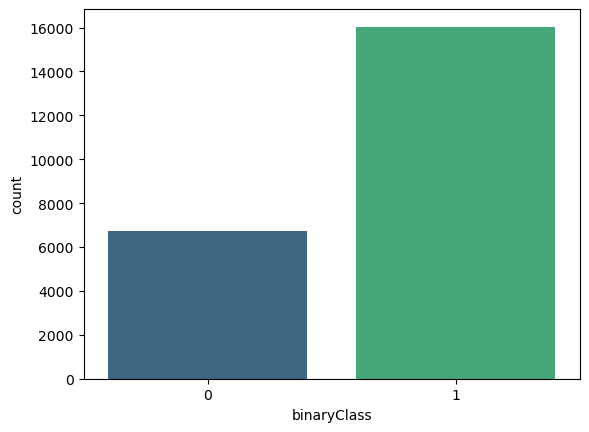

In [7]:
sns.barplot(df["binaryClass"].value_counts(), palette="viridis")
plt.show()

In [8]:
df.describe()

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,binaryClass
count,2.278400e+04,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000
mean,7.808669e+03,0.482297,0.063982,0.163900,0.121538,0.851076,0.020487,0.716131,0.003589,0.033263,0.110527,0.057437,0.967045,0.304993,0.107377,0.491626,0.704003
std,6.587242e+04,0.031876,0.150921,0.080461,0.056687,0.079455,0.057666,0.087264,0.005100,0.029567,0.105925,0.139811,0.099953,0.133998,0.090065,0.331655,0.456500
min,2.000000e+00,0.125000,0.000000,0.000000,0.000000,0.054156,0.000000,0.233702,0.000000,0.000000,0.000000,0.000000,0.003257,0.000000,0.000000,0.000000,0.000000
25%,4.270000e+02,0.464647,0.000000,0.112069,0.081236,0.819686,0.000000,0.662283,0.000000,0.016260,0.049303,0.000000,0.981410,0.221674,0.052770,0.243243,0.000000
50%,1.345500e+03,0.480397,0.003413,0.155484,0.117126,0.863645,0.000000,0.714286,0.002591,0.027523,0.081180,0.002538,0.994100,0.299800,0.086957,0.500000,1.000000
75%,4.518250e+03,0.496040,0.033377,0.203596,0.156757,0.899657,0.019196,0.771039,0.005007,0.042827,0.131430,0.029927,1.000000,0.375000,0.137931,0.750000,1.000000
max,7.322564e+06,0.923077,1.000000,0.917255,0.511872,1.000000,0.943325,1.000000,0.125000,0.705736,0.975177,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22784 entries, 0 to 22783
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P1           22784 non-null  float64
 1   P5p1         22784 non-null  float64
 2   P6p2         22784 non-null  float64
 3   P11p4        22784 non-null  float64
 4   P14p9        22784 non-null  float64
 5   P15p1        22784 non-null  float64
 6   P15p3        22784 non-null  float64
 7   P16p2        22784 non-null  float64
 8   P18p2        22784 non-null  float64
 9   P27p4        22784 non-null  float64
 10  H2p2         22784 non-null  float64
 11  H8p2         22784 non-null  float64
 12  H10p1        22784 non-null  float64
 13  H13p1        22784 non-null  float64
 14  H18pA        22784 non-null  float64
 15  H40p4        22784 non-null  float64
 16  binaryClass  22784 non-null  int64  
dtypes: float64(16), int64(1)
memory usage: 3.0 MB


In [10]:
df.isna().sum()

P1             0
P5p1           0
P6p2           0
P11p4          0
P14p9          0
P15p1          0
P15p3          0
P16p2          0
P18p2          0
P27p4          0
H2p2           0
H8p2           0
H10p1          0
H13p1          0
H18pA          0
H40p4          0
binaryClass    0
dtype: int64

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_4256\1984686083.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.iloc[:,1:-1], labels=df.columns[1:-1], vert=False)


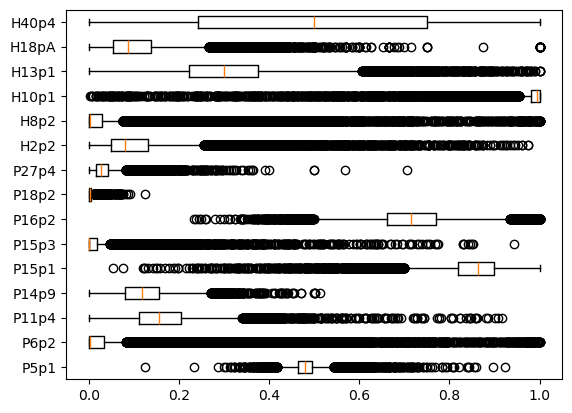

In [11]:
plt.boxplot(df.iloc[:,1:-1], labels=df.columns[1:-1], vert=False)
plt.show()

In [12]:
X = df.iloc[:,:-1]


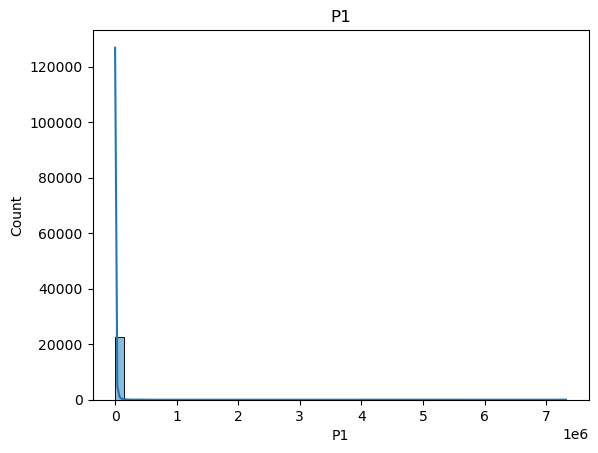

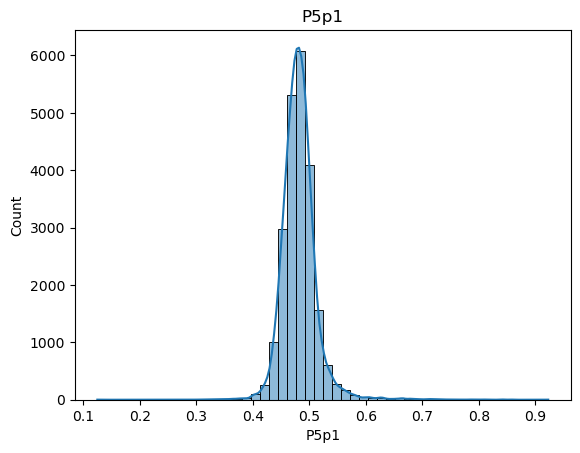

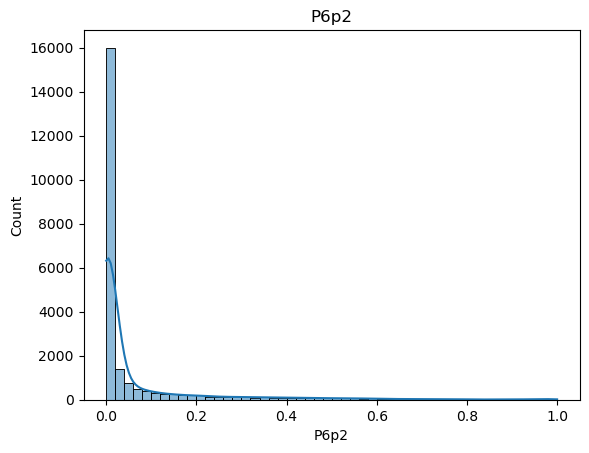

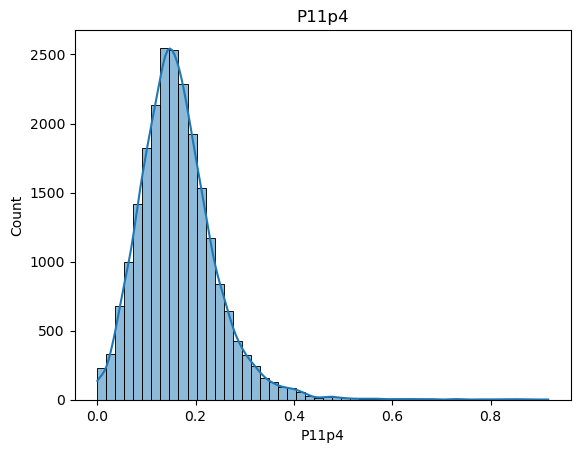

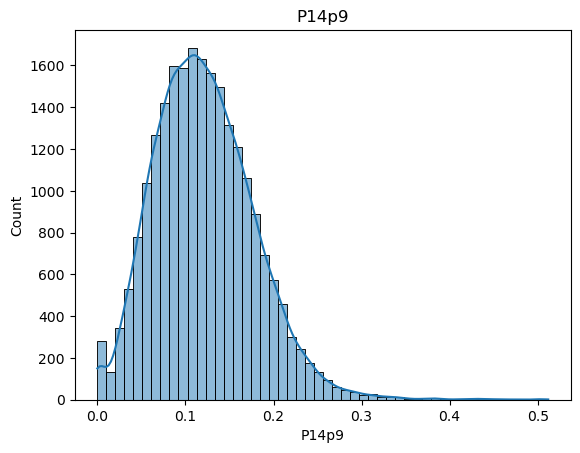

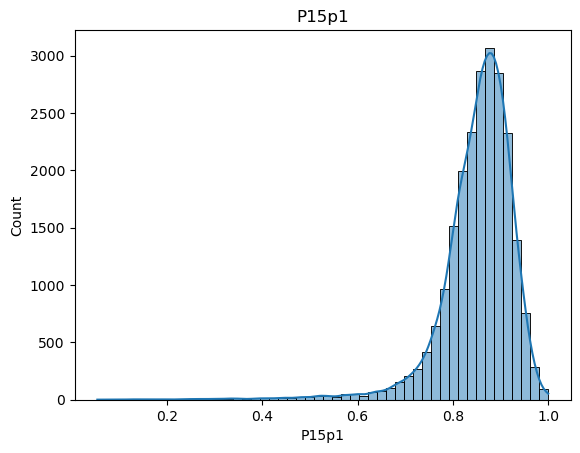

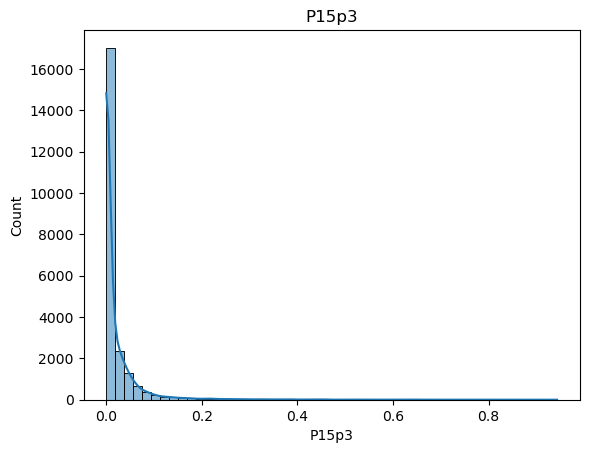

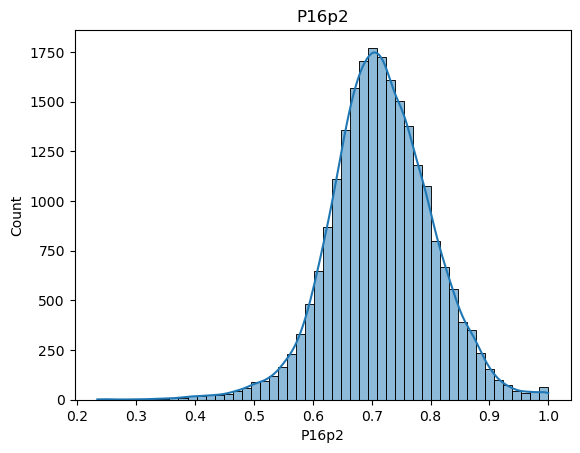

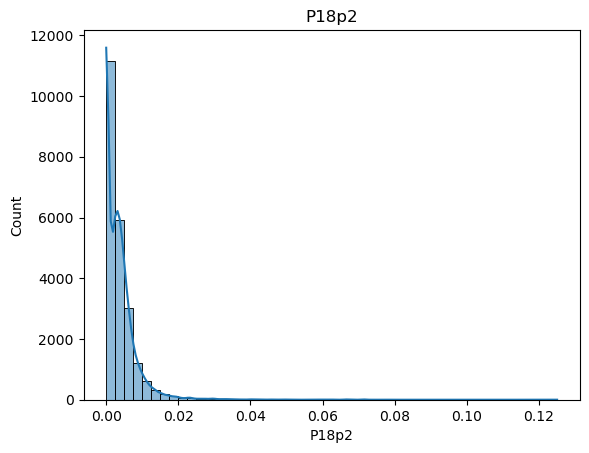

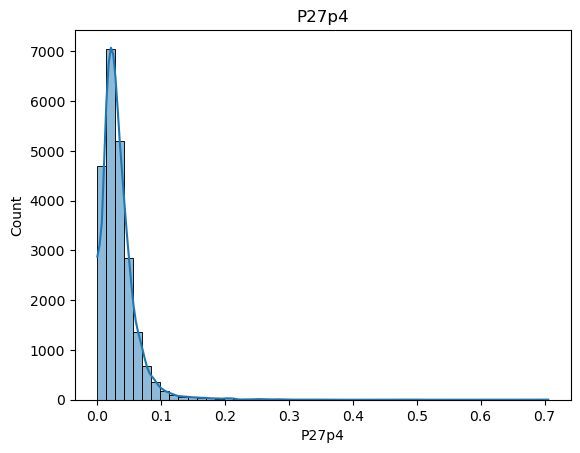

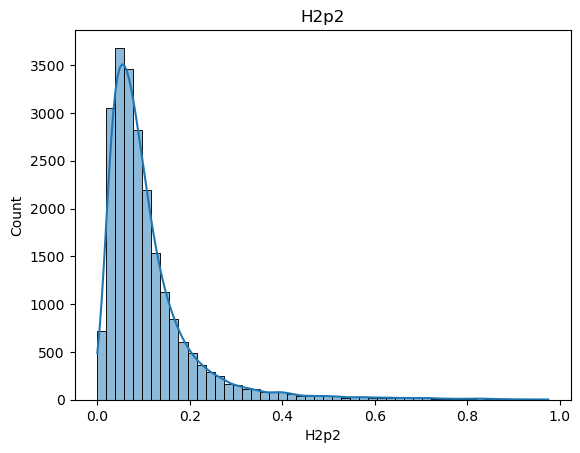

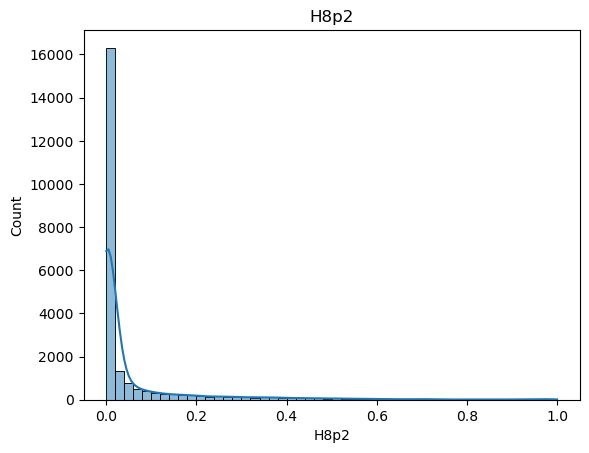

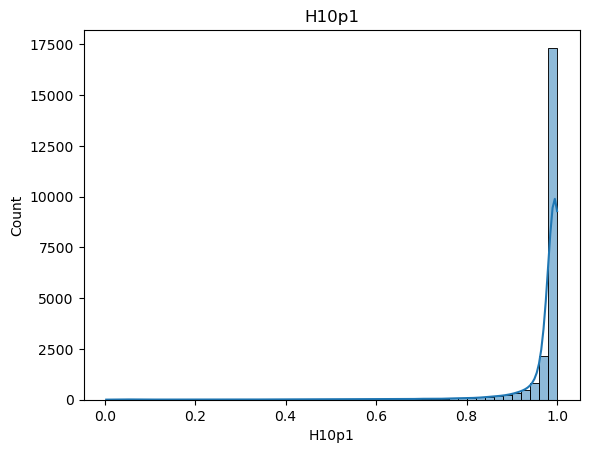

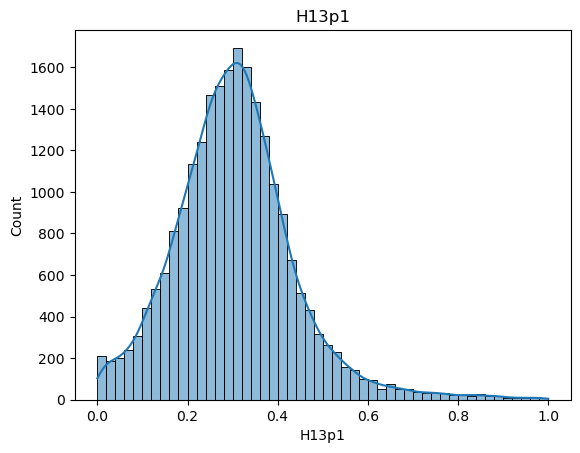

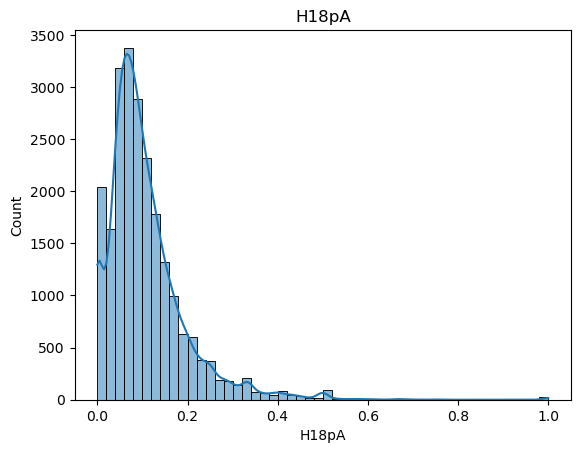

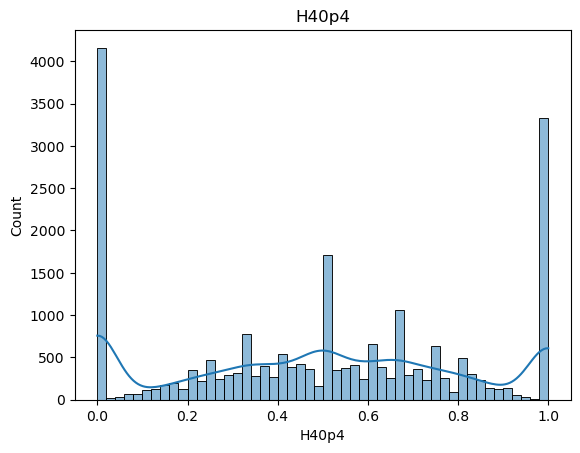

In [13]:
for col in X.columns:
    sns.histplot(X[col], bins=50, kde=True)
    plt.title(col)
    plt.show()

In [14]:
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
X_pca['binaryClass'] = df['binaryClass']
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,binaryClass
0,7703.330802,0.315521,-0.052943,0.240194,0.080950,0.389568,-0.052684,0.201577,-0.103119,-0.114799,0.020179,-0.035259,0.010804,-0.005365,-0.004132,-0.002026,0
1,-6258.669198,-0.354397,-0.071434,-0.003970,0.044339,-0.023395,0.029173,-0.031600,-0.021181,-0.030559,0.000617,-0.010677,-0.010761,0.000102,0.005693,0.001548,1
2,-3067.669198,0.192905,-0.094723,0.003284,0.040782,-0.038776,0.018496,-0.052615,0.000905,-0.003187,-0.007891,0.012652,-0.003418,0.001031,0.002453,0.000931,1
3,-7341.669198,0.488309,-0.113639,-0.226453,-0.023325,-0.006643,0.049595,0.023063,0.011618,-0.025295,0.001714,0.010953,-0.002928,0.002201,-0.004041,0.002587,1
4,-7498.669197,-0.459481,0.853405,-0.156657,0.198937,0.076109,-0.095239,-0.033767,-0.159192,0.026838,-0.049133,0.015169,-0.002013,0.029649,0.003552,0.006798,1


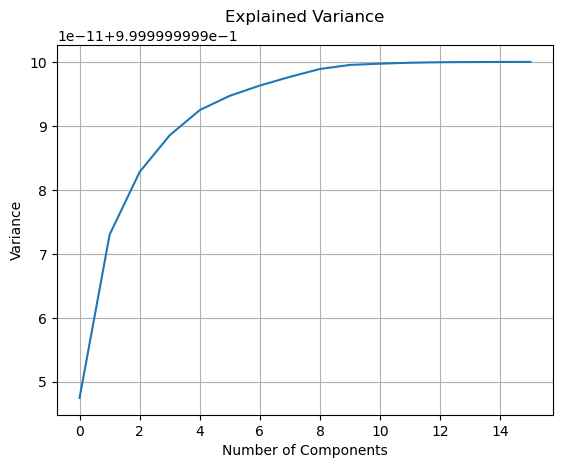

In [15]:
explained_variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.grid()
plt.show()

In [16]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X.iloc[:,1:])
X_pca = pd.DataFrame(X_pca)
X_pca['binaryClass'] = df['binaryClass']

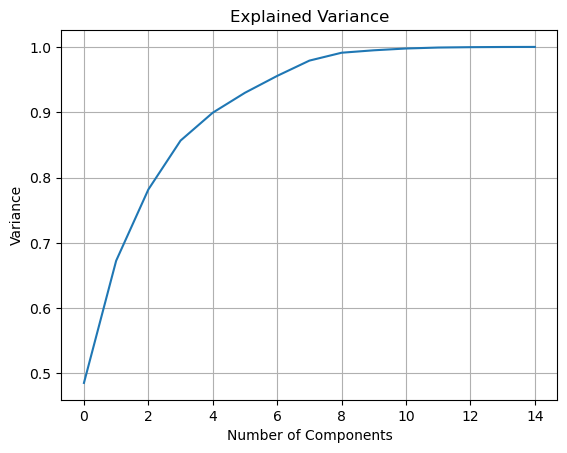

In [17]:
explained_variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.grid()
plt.show()

In [18]:
explained_variance

array([4.85479023e-01, 1.87081363e-01, 1.09148798e-01, 7.48975685e-02,
       4.27080637e-02, 3.05101322e-02, 2.58079698e-02, 2.34126743e-02,
       1.20644337e-02, 3.72543860e-03, 2.74558400e-03, 1.47043844e-03,
       5.75526548e-04, 2.72670222e-04, 1.00317221e-04])

In [19]:
kde = gaussian_kde(df.iloc[:,2])


In [20]:
x = np.linspace(0, 1, 100)
y = kde(x)

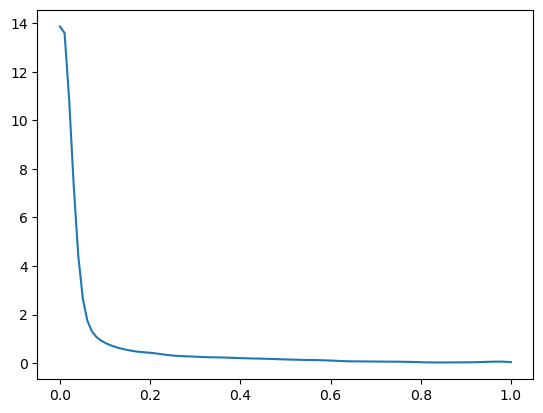

In [21]:
plt.plot(x,y)
plt.show()

Acredito que nessa etapa não devo fazer normalização, apenas analisar os dados. Retirar depois

In [22]:
#X = RobustScaler().fit_transform(X)
#X = pd.DataFrame(X, columns=df.columns[:-1])

In [23]:
X_desc = X.describe()
X_desc

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
count,2.278400e+04,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000
mean,7.808669e+03,0.482297,0.063982,0.163900,0.121538,0.851076,0.020487,0.716131,0.003589,0.033263,0.110527,0.057437,0.967045,0.304993,0.107377,0.491626
std,6.587242e+04,0.031876,0.150921,0.080461,0.056687,0.079455,0.057666,0.087264,0.005100,0.029567,0.105925,0.139811,0.099953,0.133998,0.090065,0.331655
min,2.000000e+00,0.125000,0.000000,0.000000,0.000000,0.054156,0.000000,0.233702,0.000000,0.000000,0.000000,0.000000,0.003257,0.000000,0.000000,0.000000
25%,4.270000e+02,0.464647,0.000000,0.112069,0.081236,0.819686,0.000000,0.662283,0.000000,0.016260,0.049303,0.000000,0.981410,0.221674,0.052770,0.243243
50%,1.345500e+03,0.480397,0.003413,0.155484,0.117126,0.863645,0.000000,0.714286,0.002591,0.027523,0.081180,0.002538,0.994100,0.299800,0.086957,0.500000
75%,4.518250e+03,0.496040,0.033377,0.203596,0.156757,0.899657,0.019196,0.771039,0.005007,0.042827,0.131430,0.029927,1.000000,0.375000,0.137931,0.750000
max,7.322564e+06,0.923077,1.000000,0.917255,0.511872,1.000000,0.943325,1.000000,0.125000,0.705736,0.975177,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
minX, maxX = X_desc["P6p2"].iloc[3], X_desc["P6p2"].iloc[7]

In [25]:
kde_Sc = gaussian_kde(X.iloc[:, 2])
eixo_x = np.linspace(minX, maxX, 100)
eixo_y = kde_Sc(eixo_x)

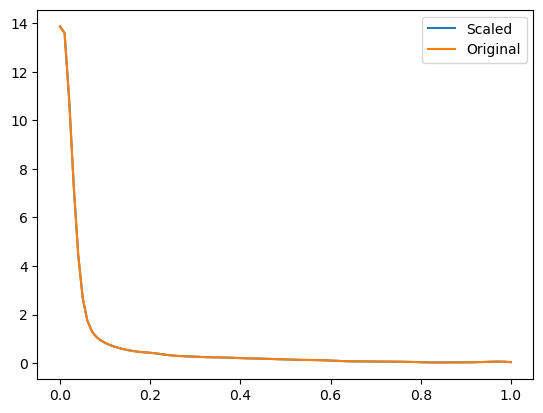

In [26]:
plt.plot(eixo_x, eixo_y)
plt.plot(x, y)
plt.legend(["Scaled", "Original"])
plt.show()

Peguei a coluna 2 e comparei as estatisticas descritivas dela após retirar os outliers em X_slice

In [27]:
q1 = X.iloc[:,2].quantile(0.25)
q3 = X.iloc[:,2].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 -1.5*iqr
upper_bound = q3 +1.5*iqr

X_slice = X[(X.iloc[:,2]>lower_bound) & (X.iloc[:,2]<upper_bound)]





In [28]:
X.iloc[:,2].describe()

count    22784.000000
mean         0.063982
std          0.150921
min          0.000000
25%          0.000000
50%          0.003413
75%          0.033377
max          1.000000
Name: P6p2, dtype: float64

In [29]:
X_slice.iloc[:,2].describe()

count    18748.000000
mean         0.008908
std          0.016341
min          0.000000
25%          0.000000
50%          0.001557
75%          0.009010
max          0.083392
Name: P6p2, dtype: float64

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_4256\3602251506.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ["Com Outliers", "Sem Outliers"] ,y= [X.iloc[:,2].mean(), X_slice.iloc[:,2].mean()], palette="viridis")


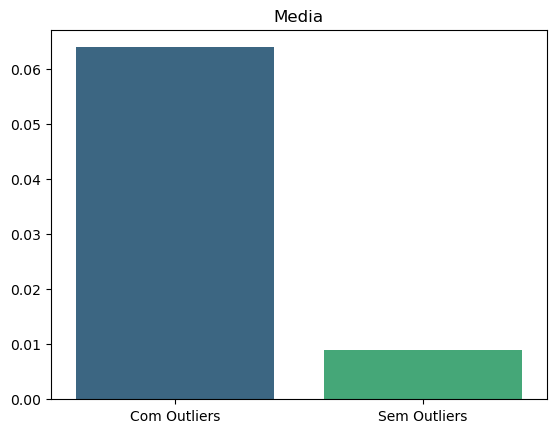

In [ ]:
sns.barplot(x = ["Com Outliers", "Sem Outliers"] ,y= [X.iloc[:,2].mean(), X_slice.iloc[:,2].mean()], palette="viridis")
plt.title("Media")
plt.show()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_4256\3785268764.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ["Com Outliers", "Sem Outliers"] ,y= [X.iloc[:,2].std(), X_slice.iloc[:,2].std()], palette="viridis")


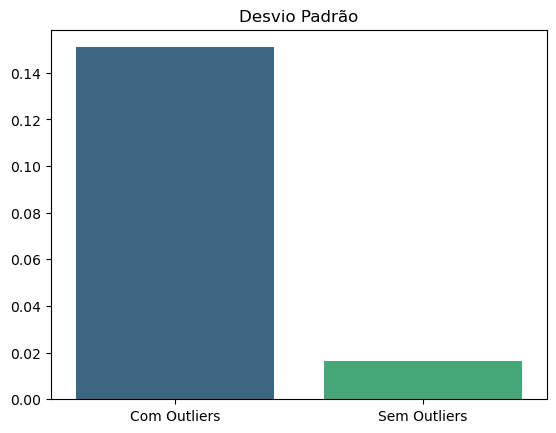

In [50]:
sns.barplot(x = ["Com Outliers", "Sem Outliers"] ,y= [X.iloc[:,2].std(), X_slice.iloc[:,2].std()], palette="viridis")
plt.title("Desvio Padrão")
plt.show()

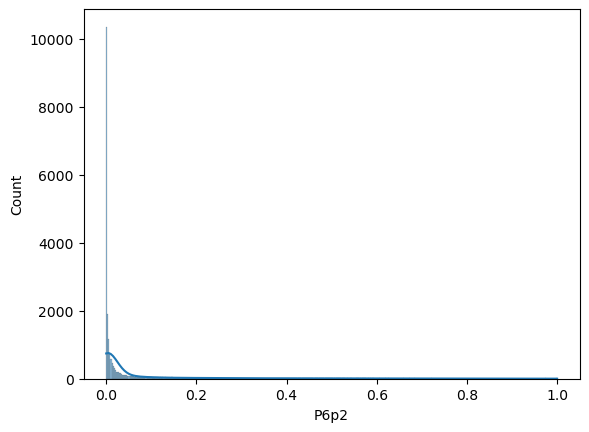

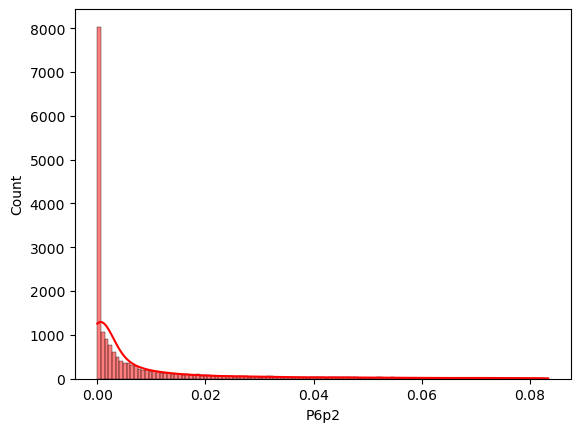

In [30]:
sns.histplot(X.iloc[:,2], kde=True)
plt.show()
sns.histplot(X_slice.iloc[:,2], color="red", kde=True)
plt.show()

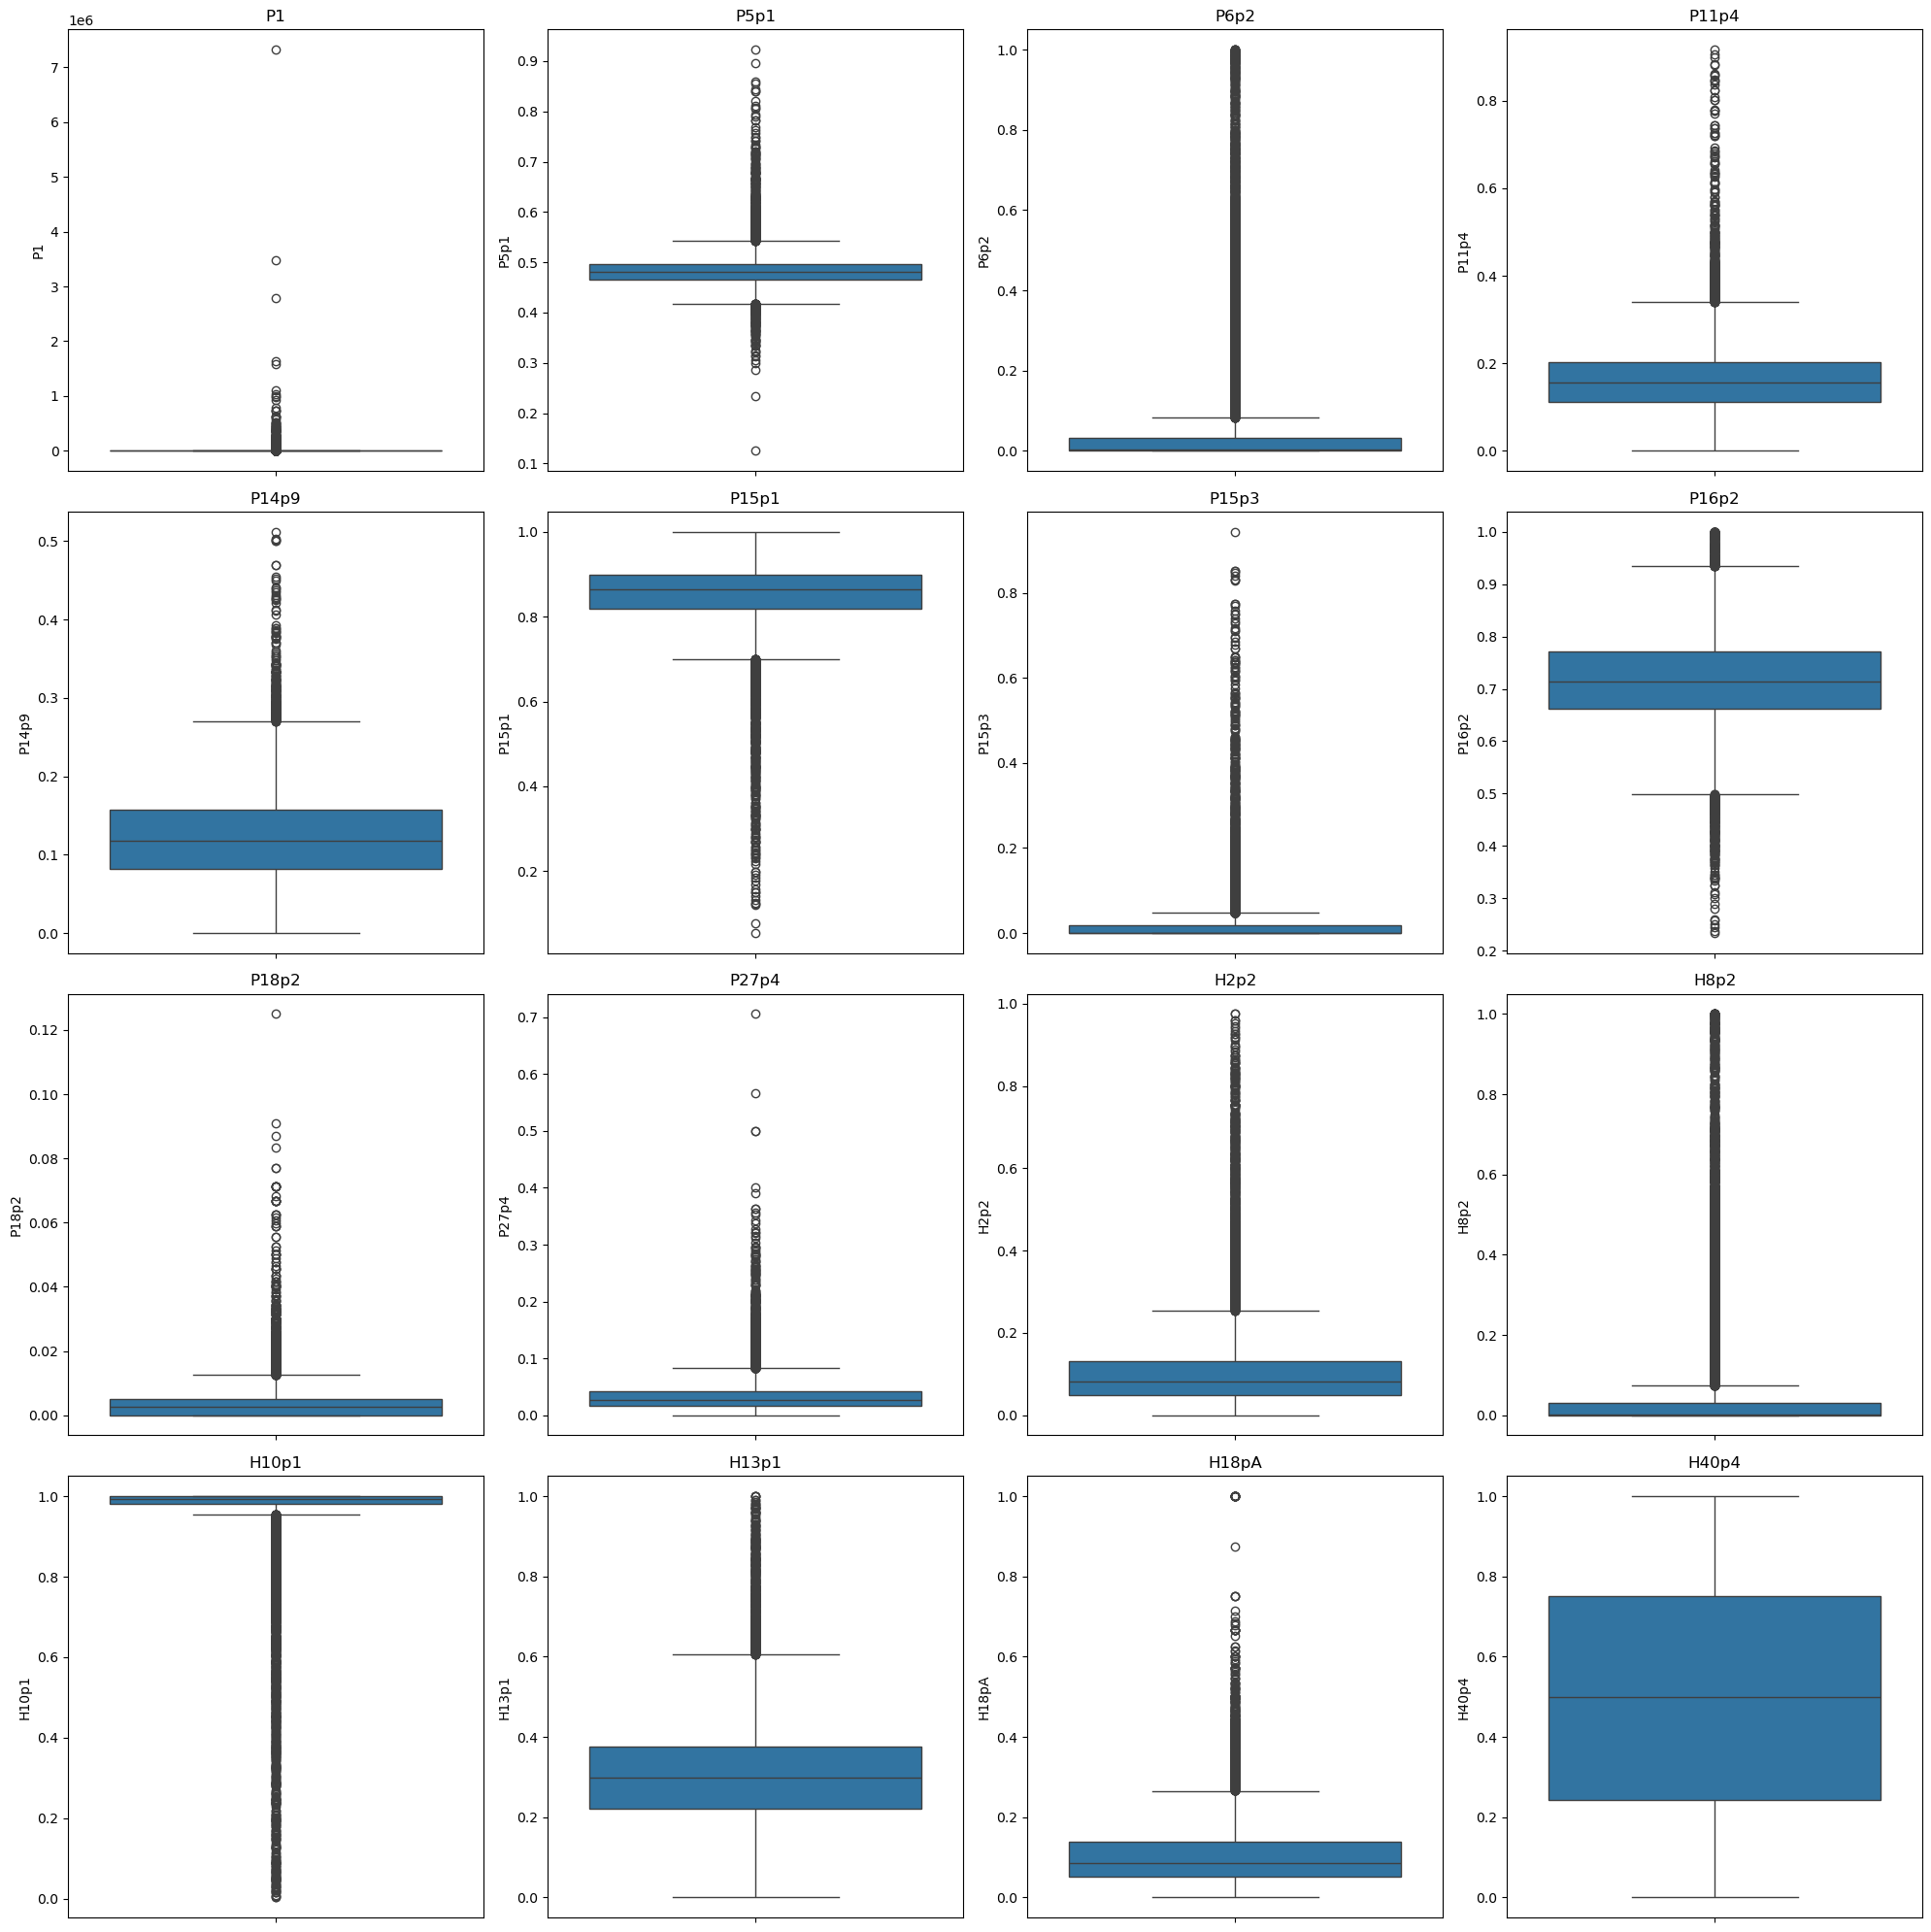

In [31]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Converter ax para array 1D para facilitar iteração
ax = np.array(ax).flatten()

# Gerar boxplots para cada coluna
for i, col in enumerate(X.columns):
    sns.boxplot(y=X[col], ax=ax[i])
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

Descobrindo o limiar

In [32]:
df2 = pd.DataFrame(arff_file_reg[0])

In [33]:
df.head()

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,binaryClass
0,15512.0,0.460869,0.049252,0.226470,0.149827,0.752837,0.010057,0.579729,0.003251,0.075912,0.625318,0.036613,0.991377,0.260116,0.052246,0.774059,0
1,1550.0,0.470968,0.002581,0.137419,0.096342,0.862581,0.000000,0.695142,0.005025,0.043551,0.064263,0.003350,0.994975,0.285267,0.060606,0.142857,1
2,4741.0,0.485341,0.000211,0.189412,0.135656,0.856992,0.000000,0.683584,0.004143,0.027965,0.065796,0.000000,0.997411,0.315433,0.065116,0.687500,1
3,467.0,0.498929,0.000000,0.100642,0.085470,0.907923,0.000000,0.780488,0.006098,0.018293,0.057471,0.000000,1.000000,0.149425,0.139535,1.000000,1
4,310.0,0.474194,0.680645,0.225807,0.128834,0.896774,0.000000,0.756303,0.008403,0.016807,0.077519,0.672269,0.991597,0.147287,0.000000,0.000000,1


In [34]:
df2.head()

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,price
0,15512.0,0.460869,0.049252,0.226470,0.149827,0.752837,0.010057,0.579729,0.003251,0.075912,0.625318,0.036613,0.991377,0.260116,0.052246,0.774059,130600.0
1,1550.0,0.470968,0.002581,0.137419,0.096341,0.862581,0.000000,0.695142,0.005025,0.043551,0.064263,0.003350,0.994975,0.285266,0.060606,0.142857,40500.0
2,4741.0,0.485341,0.000211,0.189412,0.135656,0.856992,0.000000,0.683584,0.004143,0.027965,0.065796,0.000000,0.997411,0.315433,0.065116,0.687500,28700.0
3,467.0,0.498929,0.000000,0.100642,0.085470,0.907923,0.000000,0.780488,0.006098,0.018293,0.057471,0.000000,1.000000,0.149425,0.139535,1.000000,28500.0
4,310.0,0.474193,0.680645,0.225806,0.128834,0.896774,0.000000,0.756302,0.008403,0.016807,0.077519,0.672269,0.991597,0.147287,0.000000,0.000000,24100.0


In [35]:
y1 = df['binaryClass']
y2 = df2['price']

price_class = pd.DataFrame([y1, y2]).T
price_class.head()

,binaryClass,price
0,0.0,130600.0
1,1.0,40500.0
2,1.0,28700.0
3,1.0,28500.0
4,1.0,24100.0


In [36]:
price_class[price_class["binaryClass"]==1].describe().loc["max"]

binaryClass        1.0
price          50000.0
Name: max, dtype: float64

In [37]:
price_class[price_class["binaryClass"]==0].describe().loc["min"]

binaryClass        0.0
price          50100.0
Name: min, dtype: float64

# Preparação Busca Hiper Parâmetros


Normalizar:

K-NN --- FEITO MESMO

LVQ (Learning Vector Quantization) --- Desgraça

Comitê Heterogêneo (Stacking) --- FEITO MESMO

SVM (Support Vector Machine) --- FEITO MESMO

Rede Neural MLP (Multilayer Perceptron) --- FEITO MESMO

Não Normalizar:

Random Forest --- FEITO MESMO

Comitê de Redes Neurais Artificiais --- FEITO MESMO

Árvore de Decisão --- FEITO MESMO

XGBoost --- FEITO MESMO

LightGBM --- FEITO MESMO mas overfitting

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, auc


In [3]:
arff_file = arff.loadarff('house_16H.arff')
df = pd.DataFrame(arff_file[0])
df['binaryClass'] = df["binaryClass"].map({b'N': 0, b'P': 1})

In [4]:
X = df.iloc[:, :-1]
y = df['binaryClass']
y

0        0
1        1
2        1
3        1
4        1
        ..
22779    1
22780    1
22781    0
22782    1
22783    0
Name: binaryClass, Length: 22784, dtype: int64

In [5]:
X_tr_og, _, y_tr, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_tr_og_norm = RobustScaler().fit_transform(X_tr_og)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=42,
                                                     stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2,
                                                  random_state=42, stratify=y_train)



In [7]:
X_train_norm = RobustScaler().fit_transform(X_train)
X_val_norm = RobustScaler().fit_transform(X_val)
X_test_norm = RobustScaler().fit_transform(X_test)

In [8]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

StratifiedKfold

In [9]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Função para estimativa de tempo

In [10]:
from time import time

def tempo_execucao(modelo, param_grid, cv, X_train, y_train, n_rounds = 20):
    start = time()
    teste_tempo = RandomizedSearchCV(modelo, 
                                    param_distributions=param_grid,
                                    n_iter=5,
                                    cv=cv,
                                    scoring='f1',
                                    n_jobs=-1,
                                random_state=42).fit(X_train, y_train)
    tempo_estimado = time()-start
    tempo_total = (tempo_estimado * n_rounds)
    minutos, segundos = divmod(tempo_total, 60)
    print(f"Tempo de execução: {tempo_estimado:.2f} segundos, para uma iteração")
    print(f"Tempo de execução: {minutos:.0f} minutos e {segundos:.0f} segundos, para 20 iterações")


# Busca

Para comitês, a busca procura por quantidade ideal de modelos

## KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [154]:
param_grid = {
    'n_neighbors': np.arange(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

Estimativa de tempo

In [155]:
tempo_execucao(knn, param_grid, cv, X_train_norm, y_train)

Tempo de execução: 5.32 segundos, para uma iteração
Tempo de execução: 1 minutos e 46 segundos, para 20 iterações


In [156]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(knn, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train_norm, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

In [157]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val_norm)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9115848007414272
Modelo 1: 0.911731843575419
Modelo 2: 0.9094963761382643
Modelo 3: 0.9117975437290659
Modelo 4: 0.9134651249533756
Modelo 5: 0.915324872134874
Modelo 6: 0.9135618479880775
Modelo 7: 0.9095300018577002
Modelo 8: 0.912
Modelo 9: 0.9095300018577002
Modelo 10: 0.910339706701318
Modelo 11: 0.9110986337263709
Modelo 12: 0.9157894736842105
Modelo 13: 0.9111811607639533
Modelo 14: 0.9134272300469484
Modelo 15: 0.9115898959881129
Modelo 16: 0.9134651249533756
Modelo 17: 0.9107806691449815
Modelo 18: 0.9099315701867949
Modelo 19: 0.9099315701867949


In [158]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [159]:
dic_modelos[f"modelo_{idx}"].best_params_

{'weights': 'uniform',
 'n_neighbors': 14,
 'metric': 'manhattan',
 'algorithm': 'ball_tree'}

In [160]:
knn = dic_modelos[f"modelo_{idx}"].best_estimator_
knn

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=14)

In [161]:
knn_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
knn_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
knn_mean_test_score, knn_std_test_score

(array([0.90760487, 0.8973062 , 0.90049753, 0.90468875, 0.90959953,
        0.90646514, 0.90090672, 0.89705038, 0.89832714, 0.8973062 ]),
 array([0.00353863, 0.00380848, 0.00360638, 0.00179217, 0.00258642,
        0.00292736, 0.00317177, 0.00355661, 0.00461136, 0.00380848]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

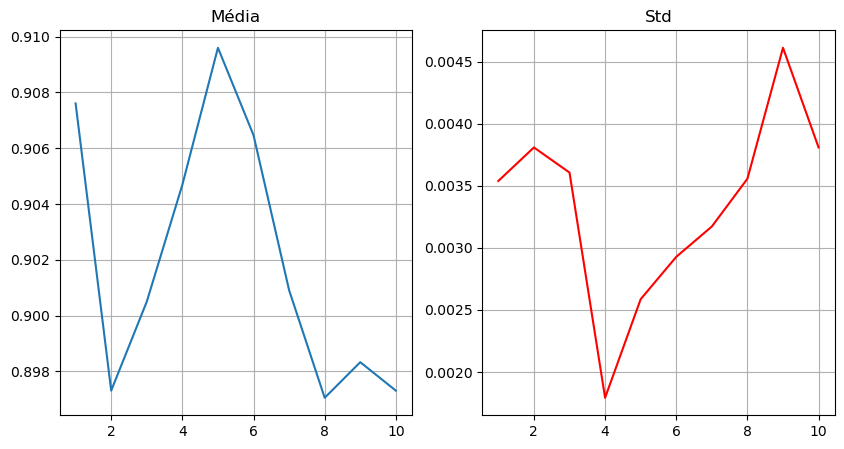

In [162]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(knn_mean_test_score)+1), y=knn_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(knn_std_test_score)+1), y=knn_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [163]:
knn.fit(X_tr_og_norm, y_tr)

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=14)

In [164]:
#treinamento
y_pred_train = knn.predict(X_tr_og_norm)

In [165]:
#teste
y_pred = knn.predict(X_test_norm)

Acurácia

In [166]:
#treinamento
treinamento_acc = knn.score(X_tr_og_norm, y_tr)

In [167]:
#teste
teste_acc = knn.score(X_test_norm, y_test)

F1-score

In [168]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [169]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [170]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [171]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [172]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [173]:
#teste
teste_precision = precision_score(y_test, y_pred)

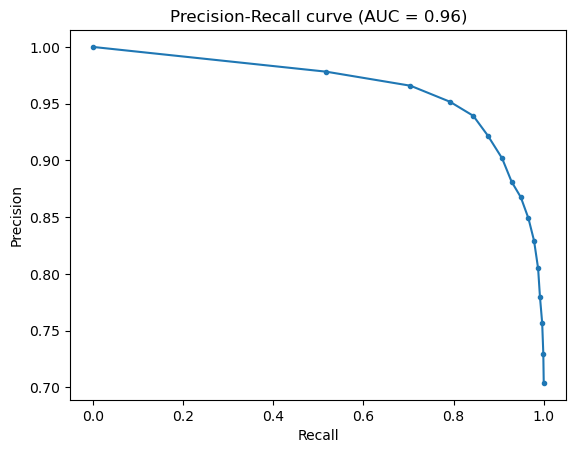

In [174]:
from sklearn.metrics import auc
y_scores = knn.predict_proba(X_test_norm)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [175]:
modelo, etapa, acc, f1, recall, precision, auc = ["knn", "knn"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_knn = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_knn

,modelo,etapa,métrica,valor
0,knn,treino,accuracy,0.889450
1,knn,teste,accuracy,0.861751
2,knn,treino,f1,0.923556
3,knn,teste,f1,0.904372
4,knn,treino,recall,0.948566
5,knn,teste,recall,0.928616
6,knn,treino,precision,0.899830
7,knn,teste,precision,0.881361
8,knn,treino,auc,0.000000
9,knn,teste,auc,0.963865


<Axes: xlabel='métrica', ylabel='valor'>

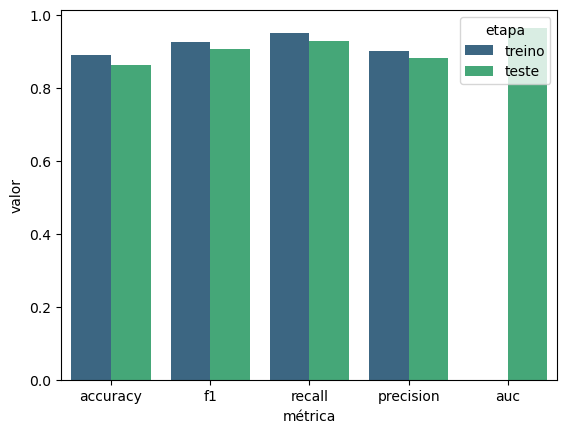

In [176]:
sns.barplot(df_long_knn, x="métrica", y="valor", hue="etapa", palette="viridis")

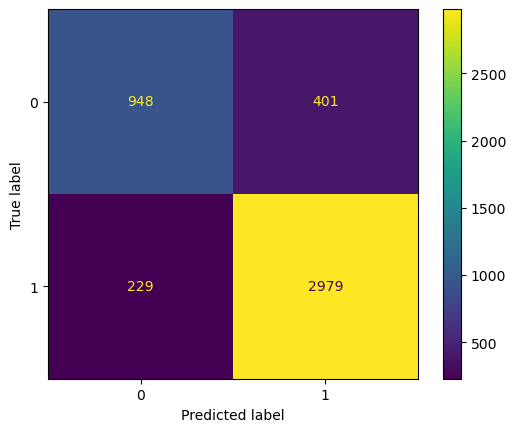

In [177]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## LVQ

In [ ]:
from sklvq.models import GLVQ
lvq = GLVQ(random_state=42)


In [12]:
param_grid = {
    "distance_type": ["squared-euclidean", "euclidean"],  # Valores válidos para distance_type
    "activation_type": ["identity", "sigmoid"],           # Valores válidos para activation_type
    "solver_type": ["steepest-gradient-descent", "adaptive-moment-estimation"],  # Valores válidos para solver_type
}

Estimativa de tempo

In [15]:
tempo_execucao(lvq, param_grid, cv, X_train_norm, y_train)

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Tempo de execução: 98.52 segundos, para uma iteração
Tempo de execução: 32 minutos e 50 segundos, para 20 iterações


In [16]:
dic_modelos = {}
for i in range(1):
    modelo = RandomizedSearchCV(lvq, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train_norm, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [33]:
print(type(dic_modelos[f"modelo_{i}"].best_estimator_))
print(type(dic_modelos[f"modelo_{i}"].best_estimator_))
print(dic_modelos[f"modelo_{i}"].best_estimator_)



<class 'sklvq.models._glvq.GLVQ'>
<class 'sklvq.models._glvq.GLVQ'>
GLVQ(activation_type='identity', random_state=42)


In [32]:
f1_scores = []
for i in range(1):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val_norm)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

12

In [ ]:
knn = dic_modelos[f"modelo_{idx}"].best_estimator_
knn

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=14)

In [ ]:
knn_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
knn_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
knn_mean_test_score, knn_std_test_score

(array([0.90760487, 0.8973062 , 0.90049753, 0.90468875, 0.90959953,
        0.90646514, 0.90090672, 0.89705038, 0.89832714, 0.8973062 ]),
 array([0.00353863, 0.00380848, 0.00360638, 0.00179217, 0.00258642,
        0.00292736, 0.00317177, 0.00355661, 0.00461136, 0.00380848]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

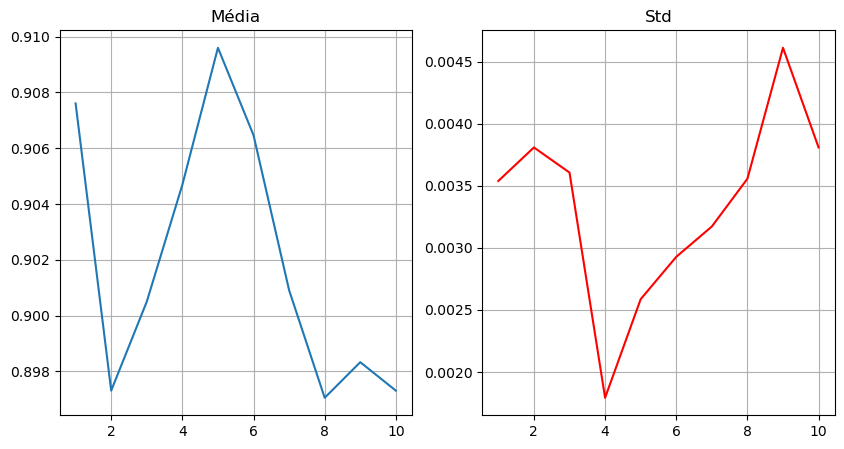

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(knn_mean_test_score)+1), y=knn_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(knn_std_test_score)+1), y=knn_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [ ]:
knn.fit(X_tr_og_norm, y_tr)

In [ ]:
#treinamento
y_pred_train = knn.predict(X_tr_og_norm)

In [ ]:
#teste
y_pred = knn.predict(X_test_norm)

Acurácia

In [ ]:
#treinamento
treinamento_acc = knn.score(X_tr_og_norm, y_tr)

In [ ]:
#teste
teste_acc = knn.score(X_test_norm, y_test)

F1-score

In [ ]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [ ]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [ ]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_precision = precision_score(y_test, y_pred)

In [ ]:
modelo, etapa, acc, f1, recall, precision = ["knn", "knn"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision
})

df_long = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long

,modelo,etapa,métrica,valor
0,knn,treino,accuracy,0.883963
1,knn,teste,accuracy,0.863287
2,knn,treino,f1,0.919956
3,knn,teste,f1,0.905706
4,knn,treino,recall,0.947163
5,knn,teste,recall,0.932668
6,knn,treino,precision,0.894268
7,knn,teste,precision,0.880259


<Axes: xlabel='métrica', ylabel='valor'>

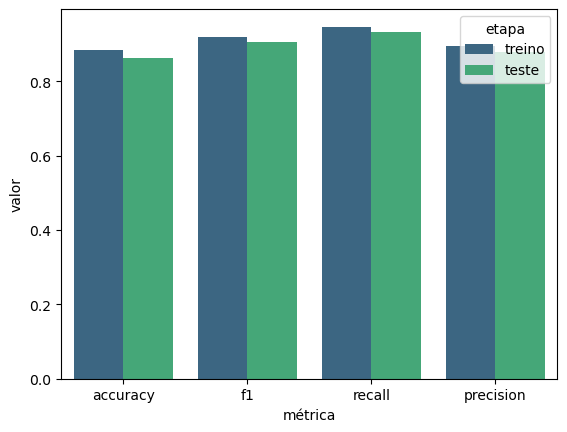

In [ ]:
sns.barplot(df_long, x="métrica", y="valor", hue="etapa", palette="viridis")

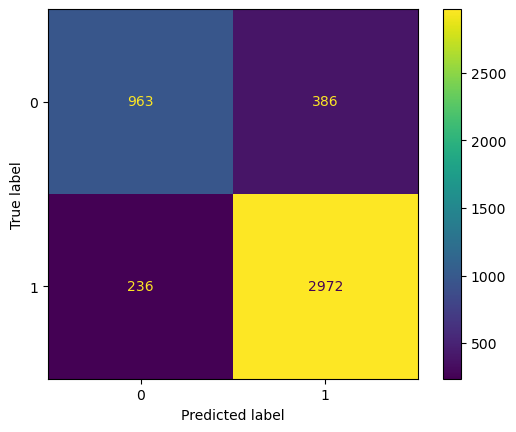

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## SVC

In [178]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=42)

In [179]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 15, 20, 25, 30, 35, 40, 50],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1','l2'],  
    'dual': [False, True],  
    'max_iter': [1000, 5000, 10000]
}

Estimativa de tempo

In [180]:
tempo_execucao(svc, param_grid, cv, X_train_norm, y_train)

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 321, in fit
    self.coef_, se

Tempo de execução: 24.21 segundos, para uma iteração
Tempo de execução: 8 minutos e 4 segundos, para 20 iterações


c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [181]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(svc, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train_norm, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 321, in fit
    self.coef_, s

In [182]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val_norm)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.8884297520661157
Modelo 1: 0.8903980381060177
Modelo 2: 0.8891825561638663
Modelo 3: 0.8892668178382465
Modelo 4: 0.8892713711990821
Modelo 5: 0.8841090302243649
Modelo 6: 0.8748396554883636
Modelo 7: 0.8884381338742393
Modelo 8: 0.8851414652426457
Modelo 9: 0.890188679245283
Modelo 10: 0.8871117723637716
Modelo 11: 0.8875983514424878
Modelo 12: 0.8456076283221748
Modelo 13: 0.8926875593542261
Modelo 14: 0.8911191062298807
Modelo 15: 0.8873398643556896
Modelo 16: 0.8913500095474508
Modelo 17: 0.890188679245283
Modelo 18: 0.890188679245283
Modelo 19: 0.8892668178382465


In [183]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [184]:
dic_modelos[f"modelo_{idx}"].best_params_


{'penalty': 'l2', 'max_iter': 10000, 'loss': 'hinge', 'dual': True, 'C': 20}

In [185]:
svc = dic_modelos[f"modelo_{idx}"].best_estimator_
svc

LinearSVC(C=20, dual=True, loss='hinge', max_iter=10000, random_state=42)

In [186]:
svc_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
svc_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
svc_mean_test_score, svc_std_test_score

(array([       nan,        nan, 0.8778793 ,        nan, 0.88049334,
               nan, 0.87770117,        nan,        nan, 0.87663159]),
 array([       nan,        nan, 0.00215486,        nan, 0.00509182,
               nan, 0.00273457,        nan,        nan, 0.00209053]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

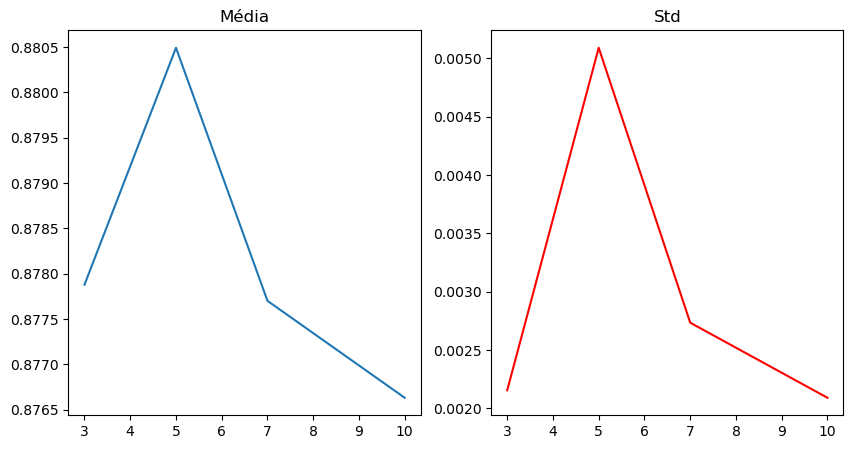

In [187]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(svc_mean_test_score)+1), y=svc_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1,len(svc_std_test_score)+1), y=svc_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[0].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [188]:
svc.fit(X_tr_og_norm, y_tr)

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=20, dual=True, loss='hinge', max_iter=10000, random_state=42)

In [189]:
#treinamento
y_pred_train = svc.predict(X_tr_og_norm)

In [190]:
#teste
y_pred = svc.predict(X_test_norm)

Acurácia

In [191]:
#treinamento
treinamento_acc = svc.score(X_tr_og_norm, y_tr)

In [192]:
#teste
teste_acc = svc.score(X_test_norm, y_test)

F1-score

In [193]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [194]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [195]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [196]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [197]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [198]:
#teste
teste_precision = precision_score(y_test, y_pred)

In [199]:
'''y_scores = svc.predict_proba(X_test_norm)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()'''


"y_scores = svc.predict_proba(X_test_norm)[:, 1]\nprecision, recall, thresholds = precision_recall_curve(y_test, y_scores)\npr_auc = auc(recall, precision)\n\nplt.plot(recall, precision, marker='.')\nplt.xlabel('Recall')\nplt.ylabel('Precision')\nplt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')\nplt.show()"

In [200]:
modelo, etapa, acc, f1, recall, precision, auc = ["svc", "svc"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [pd.NA, pd.NA]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision
})

df_long_svc = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_svc

,modelo,etapa,métrica,valor
0,svc,treino,accuracy,0.829868
1,svc,teste,accuracy,0.830590
2,svc,treino,f1,0.883906
3,svc,teste,f1,0.883770
4,svc,treino,recall,0.919966
5,svc,teste,recall,0.914900
6,svc,treino,precision,0.850566
7,svc,teste,precision,0.854688


<Axes: xlabel='métrica', ylabel='valor'>

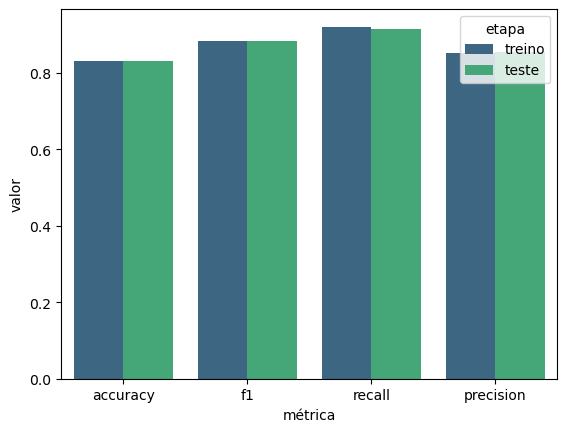

In [201]:
sns.barplot(df_long_svc, x="métrica", y="valor", hue="etapa", palette="viridis")

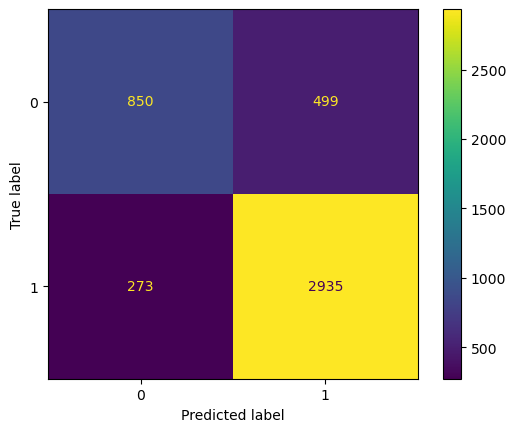

In [202]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## MLP

In [203]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42, early_stopping=True)

In [204]:
param_grid = {
    "hidden_layer_sizes": [(125,), (100,), (50,), (25,), (10,)],
    "activation":   ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'sgd', 'adam'],
    "batch_size": [16, 32, 64, 128],
    "learning_rate": ['constant', 'invscaling', 'adaptive']
}

Estimativa de tempo

In [205]:
tempo_execucao(mlp, param_grid, cv, X_train_norm, y_train)

Tempo de execução: 93.65 segundos, para uma iteração
Tempo de execução: 31 minutos e 13 segundos, para 20 iterações


c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [206]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(mlp, 
                                param_distributions=param_grid,
                                n_iter=5,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train_norm, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

In [207]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val_norm)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9261538461538461
Modelo 1: 0.9280339571676636
Modelo 2: 0.9248018557896772
Modelo 3: 0.9285026016573521
Modelo 4: 0.9245610650202586
Modelo 5: 0.9239382239382239
Modelo 6: 0.9260536398467433
Modelo 7: 0.9248018557896772
Modelo 8: 0.9204178537511871
Modelo 9: 0.9271676300578034
Modelo 10: 0.9242072699149265
Modelo 11: 0.9140565317035906
Modelo 12: 0.9270651963629328
Modelo 13: 0.9270651963629328
Modelo 14: 0.9261538461538461
Modelo 15: 0.9280339571676636
Modelo 16: 0.9282960678488821
Modelo 17: 0.9270651963629328
Modelo 18: 0.9244052187260169
Modelo 19: 0.9236084452975047


In [208]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [209]:
dic_modelos[f"modelo_{idx}"].best_params_


{'solver': 'lbfgs',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (50,),
 'batch_size': 32,
 'activation': 'logistic'}

In [210]:
mlp = dic_modelos[f"modelo_{idx}"].best_estimator_
mlp

MLPClassifier(activation='logistic', batch_size=32, early_stopping=True,
              hidden_layer_sizes=(50,), learning_rate='adaptive',
              random_state=42, solver='lbfgs')

In [211]:
mlp_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
mlp_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
mlp_mean_test_score, mlp_std_test_score

(array([0.9126353 , 0.9170716 , 0.84164576, 0.82666049, 0.91685528]),
 array([0.00439157, 0.00248644, 0.00227497, 0.00043019, 0.00379301]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

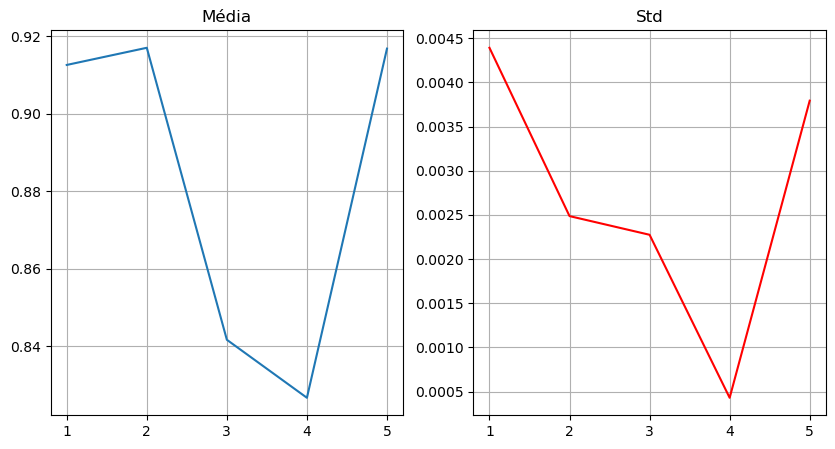

In [212]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(mlp_mean_test_score)+1), y=mlp_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(mlp_std_test_score)+1), y=mlp_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [213]:
mlp.fit(X_tr_og_norm, y_tr)

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', batch_size=32, early_stopping=True,
              hidden_layer_sizes=(50,), learning_rate='adaptive',
              random_state=42, solver='lbfgs')

In [214]:
#treinamento
y_pred_train = mlp.predict(X_tr_og_norm)

In [215]:
#teste
y_pred = mlp.predict(X_test_norm)

Acurácia

In [216]:
#treinamento
treinamento_acc = mlp.score(X_tr_og_norm, y_tr)

In [217]:
#teste
teste_acc = mlp.score(X_test_norm, y_test)

F1-score

In [218]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [219]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [220]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [221]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [222]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [223]:
#teste
teste_precision = precision_score(y_test, y_pred)

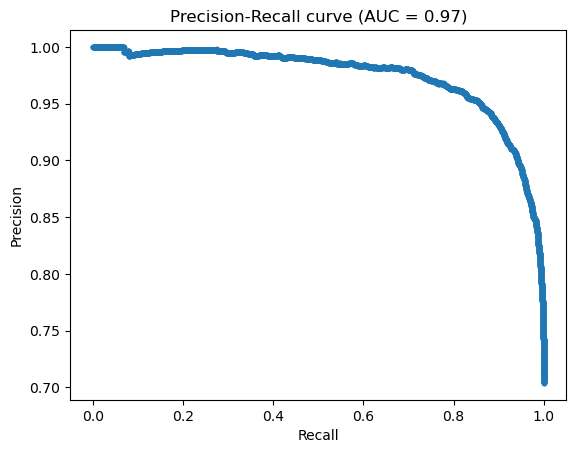

In [224]:
from sklearn.metrics import auc
y_scores = mlp.predict_proba(X_test_norm)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [225]:
modelo, etapa, acc, f1, recall, precision, auc = ["mlp", "mlp"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_mlp = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_mlp

,modelo,etapa,métrica,valor
0,mlp,treino,accuracy,0.906841
1,mlp,teste,accuracy,0.884134
2,mlp,treino,f1,0.934445
3,mlp,teste,f1,0.918038
4,mlp,treino,recall,0.943111
5,mlp,teste,recall,0.921758
6,mlp,treino,precision,0.925937
7,mlp,teste,precision,0.914348
8,mlp,treino,auc,0.000000
9,mlp,teste,auc,0.974419


<Axes: xlabel='métrica', ylabel='valor'>

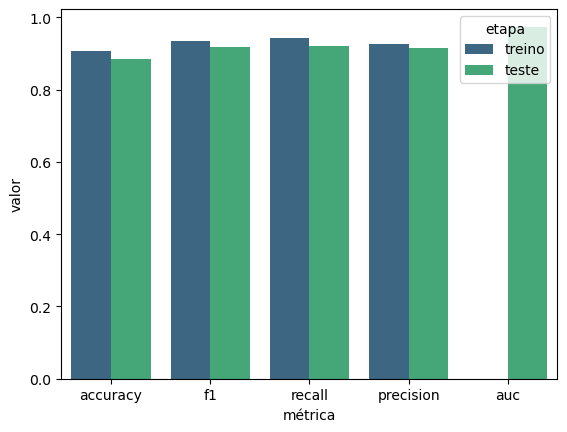

In [226]:
sns.barplot(df_long_mlp, x="métrica", y="valor", hue="etapa", palette="viridis")

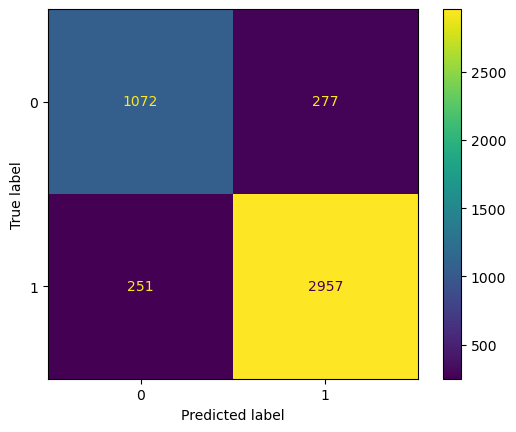

In [227]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Decision Tree

In [228]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)

In [229]:
param_grid = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    "splitter": ['best', 'random'],
    "max_depth": np.arange(1    , 17),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    "max_features": np.arange(1, 17),
    "max_leaf_nodes": np.arange(2, 20),
    "class_weight": ['balanced', None]
}

Estimativa de tempo

In [230]:
tempo_execucao(tree, param_grid, cv, X_train, y_train)

Tempo de execução: 6.42 segundos, para uma iteração
Tempo de execução: 2 minutos e 8 segundos, para 20 iterações


In [231]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(tree, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

In [232]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.8591404482829529
Modelo 1: 0.8786898503841488
Modelo 2: 0.8729192042224929
Modelo 3: 0.8710415871804654
Modelo 4: 0.8923732094463802
Modelo 5: 0.8819210160746179
Modelo 6: 0.8723741577487119
Modelo 7: 0.881079027355623
Modelo 8: 0.8852459016393442
Modelo 9: 0.8973471741637832
Modelo 10: 0.8701561065197428
Modelo 11: 0.8853087840429612
Modelo 12: 0.8850118953211736
Modelo 13: 0.8852459016393442
Modelo 14: 0.8865578865578866
Modelo 15: 0.852177554438861
Modelo 16: 0.8841033672670321
Modelo 17: 0.881328797278367
Modelo 18: 0.8859140859140859
Modelo 19: 0.8660764739122245


In [233]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [234]:
dic_modelos[f"modelo_{idx}"].best_params_

{'splitter': 'best',
 'min_samples_split': 15,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 13,
 'max_features': 14,
 'max_depth': 8,
 'criterion': 'gini',
 'class_weight': None}

In [235]:
tree = dic_modelos[f"modelo_{idx}"].best_estimator_
tree

DecisionTreeClassifier(max_depth=8, max_features=14, max_leaf_nodes=13,
                       min_samples_leaf=3, min_samples_split=15,
                       random_state=42)

In [236]:
tree_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
tree_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
tree_mean_test_score, tree_std_test_score

(array([0.88741848, 0.86042428, 0.8820352 , 0.55623114, 0.85599798,
        0.48030532, 0.79173156, 0.57784531, 0.83778386, 0.82742181]),
 array([0.00335749, 0.0121506 , 0.00586925, 0.02779065, 0.0020298 ,
        0.00825062, 0.00735839, 0.02627091, 0.01344937, 0.00112468]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

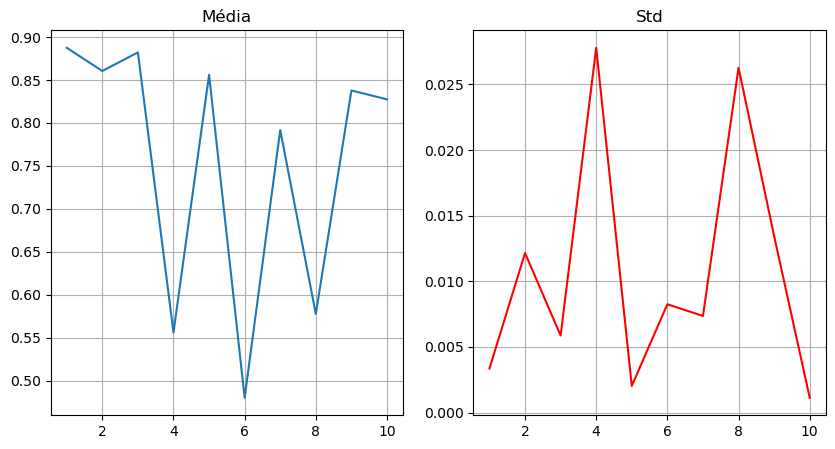

In [237]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(tree_mean_test_score)+1), y=tree_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(tree_std_test_score)+1), y=tree_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [238]:
tree.fit(X_tr_og, y_tr)

DecisionTreeClassifier(max_depth=8, max_features=14, max_leaf_nodes=13,
                       min_samples_leaf=3, min_samples_split=15,
                       random_state=42)

In [239]:
#treinamento
y_pred_train = tree.predict(X_tr_og)

In [240]:
#teste
y_pred = tree.predict(X_test)

Acurácia

In [241]:
#treinamento
treinamento_acc = tree.score(X_tr_og, y_tr)

In [242]:
#teste
teste_acc = tree.score(X_test, y_test)

F1-score

In [243]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [244]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [245]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [246]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [247]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [248]:
#teste
teste_precision = precision_score(y_test, y_pred)

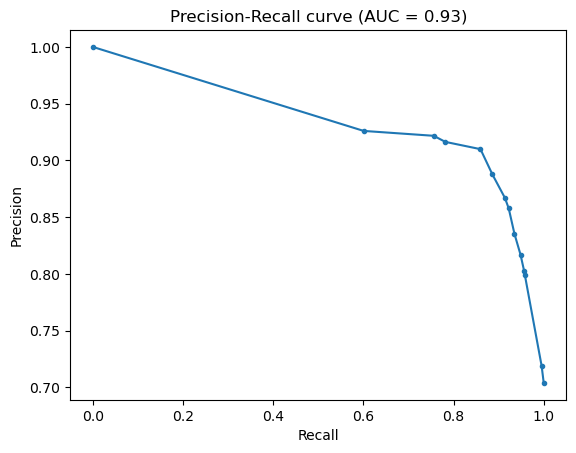

In [249]:
from sklearn.metrics import auc
y_scores = tree.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [250]:
modelo, etapa, acc, f1, recall, precision, auc = ["tree", "tree"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_tree = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_tree

,modelo,etapa,métrica,valor
0,tree,treino,accuracy,0.847479
1,tree,teste,accuracy,0.841343
2,tree,treino,f1,0.888362
3,tree,teste,f1,0.884116
4,tree,treino,recall,0.861986
5,tree,teste,recall,0.859726
6,tree,treino,precision,0.916404
7,tree,teste,precision,0.909931
8,tree,treino,auc,0.000000
9,tree,teste,auc,0.933402


<Axes: xlabel='métrica', ylabel='valor'>

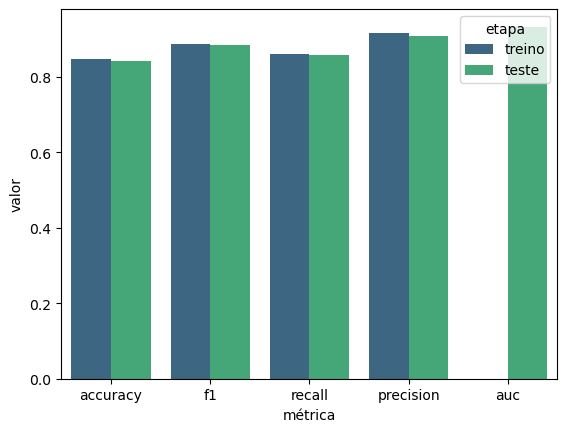

In [251]:
sns.barplot(df_long_tree, x="métrica", y="valor", hue="etapa", palette="viridis")

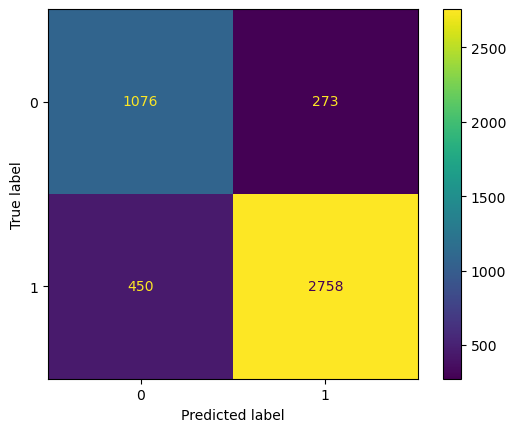

In [252]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Random Forest

In [253]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)

In [254]:
param_grid = {
    "n_estimators": np.arange(10, 151, 10),
    "bootstrap": [True, False],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": np.arange(1, 17),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    "max_features": np.arange(1, 17),
    "max_leaf_nodes": np.arange(2, 20),
    "class_weight": ['balanced', None]
}

Estimativa de tempo

In [255]:
tempo_execucao(forest, param_grid, cv, X_train_norm, y_train)

Tempo de execução: 14.32 segundos, para uma iteração
Tempo de execução: 4 minutos e 46 segundos, para 20 iterações


In [256]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(forest, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

In [257]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9060646642433519
Modelo 1: 0.909706546275395
Modelo 2: 0.9085400492330998
Modelo 3: 0.9048882152330429
Modelo 4: 0.9076718065867123
Modelo 5: 0.9064994298745724
Modelo 6: 0.9100569259962049
Modelo 7: 0.9088482074752098
Modelo 8: 0.8975317875841436
Modelo 9: 0.8758773550055412
Modelo 10: 0.9056533133657806
Modelo 11: 0.9102001906577694
Modelo 12: 0.8995999237950085
Modelo 13: 0.9115516584064048
Modelo 14: 0.9035418236623964
Modelo 15: 0.9102661596958175
Modelo 16: 0.906559877955759
Modelo 17: 0.9076576576576577
Modelo 18: 0.9071816988561785
Modelo 19: 0.8925019127773527


In [258]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [259]:
dic_modelos[f"modelo_{idx}"].best_params_

{'n_estimators': 130,
 'min_samples_split': 17,
 'min_samples_leaf': 13,
 'max_leaf_nodes': 16,
 'max_features': 7,
 'max_depth': 14,
 'criterion': 'gini',
 'class_weight': None,
 'bootstrap': False}

In [260]:
forest = dic_modelos[f"modelo_{idx}"].best_estimator_
forest

RandomForestClassifier(bootstrap=False, max_depth=14, max_features=7,
                       max_leaf_nodes=16, min_samples_leaf=13,
                       min_samples_split=17, n_estimators=130, random_state=42)

In [261]:
forest_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
forest_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
forest_mean_test_score, forest_std_test_score

(array([0.84499138, 0.89882101, 0.90342425, 0.83813764, 0.84540773,
        0.89339972, 0.83622746, 0.83983891, 0.86530334, 0.85168269]),
 array([0.01531149, 0.00258814, 0.00183438, 0.0069523 , 0.00607874,
        0.00403309, 0.01858829, 0.00050574, 0.00504123, 0.00254574]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

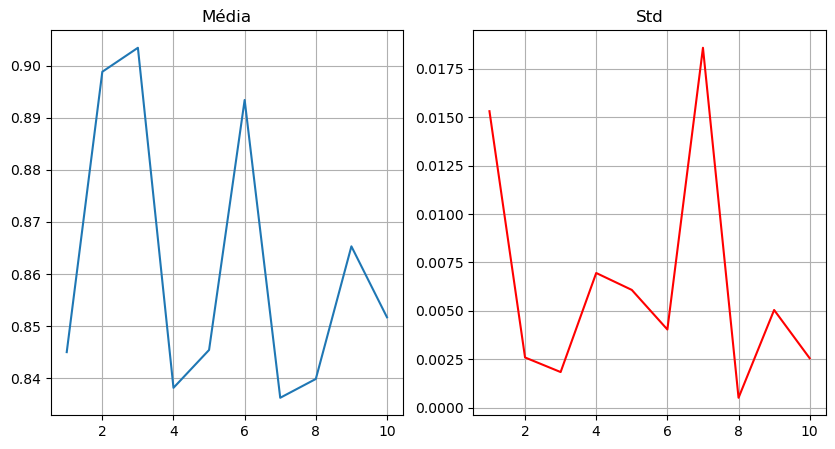

In [262]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(forest_mean_test_score)+1), y=forest_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(forest_std_test_score)+1), y=forest_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [263]:
forest.fit(X_tr_og, y_tr)

RandomForestClassifier(bootstrap=False, max_depth=14, max_features=7,
                       max_leaf_nodes=16, min_samples_leaf=13,
                       min_samples_split=17, n_estimators=130, random_state=42)

In [264]:
#treinamento
y_pred_train = forest.predict(X_tr_og)

In [265]:
#teste
y_pred = forest.predict(X_test)

Acurácia

In [266]:
#treinamento
treinamento_acc = forest.score(X_tr_og, y_tr)

In [267]:
#teste
teste_acc = forest.score(X_test, y_test)

F1-score

In [268]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [269]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [270]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [271]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [272]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [273]:
#teste
teste_precision = precision_score(y_test, y_pred)

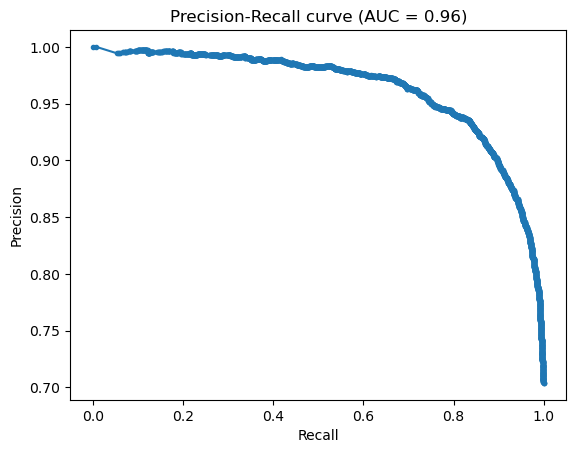

In [274]:
from sklearn.metrics import auc
y_scores = forest.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [275]:
modelo, etapa, acc, f1, recall, precision, auc = ["forest", "forest"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_forest = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_forest

,modelo,etapa,métrica,valor
0,forest,treino,accuracy,0.871345
1,forest,teste,accuracy,0.856704
2,forest,treino,f1,0.910267
3,forest,teste,f1,0.899770
4,forest,treino,recall,0.926901
5,forest,teste,recall,0.913653
6,forest,treino,precision,0.894218
7,forest,teste,precision,0.886302
8,forest,treino,auc,0.000000
9,forest,teste,auc,0.963163


<Axes: xlabel='métrica', ylabel='valor'>

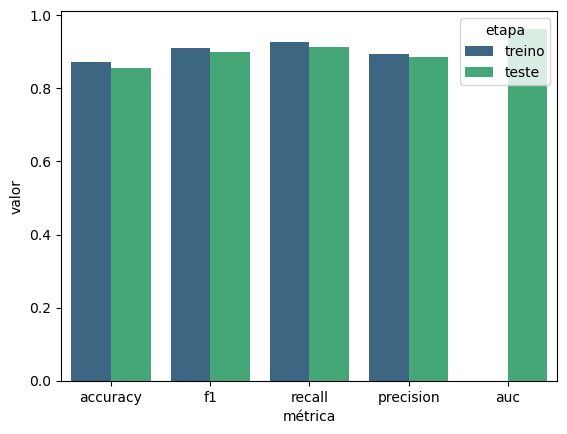

In [276]:
sns.barplot(df_long_forest, x="métrica", y="valor", hue="etapa", palette="viridis")

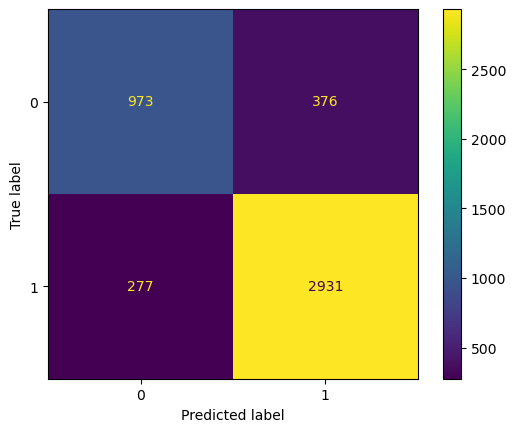

In [277]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Comitê de redes neurais

In [278]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [279]:
def generate_mlp_models(n_models):
    """Gera uma lista de MLPs com hiperparâmetros aleatórios."""
    return [
        MLPClassifier(
            hidden_layer_sizes=random.choice([(50,), (100,), (50, 50)]),  # Usando random.choice()
            activation=random.choice(['relu', 'tanh']),
            alpha=random.choice([0.0001, 0.001, 0.01]),
            solver=random.choice(['adam', 'sgd']),
            random_state=i,
            early_stopping=True
        ) for i in range(n_models)
    ]

In [280]:
def random_select(lista_modelos):
    lista = np.random.choice(lista_modelos, size=np.random.randint(2,len(lista_modelos)), replace=False)
    return [(f"mlp_{i}", model) for i, model in enumerate(lista)]

In [281]:
n_executions = 10
dic_modelos = {}
for i in range(n_executions):
    print(f"\n🔄 Rodando RandomizedSearchCV - Execução {i+1}/{n_executions} 🔄")

    mlp_models = generate_mlp_models(10) 
    selected_models = random_select(mlp_models)  
    voting_clf = VotingClassifier(estimators=selected_models)

    param_distributions = {"voting": ['soft', 'hard']}

    modelo = RandomizedSearchCV(
        estimator=voting_clf,
        param_distributions=param_distributions,
        n_iter=2, 
        cv=cv,
        scoring='f1',
        n_jobs=-1
    ).fit(X_train_norm, y_train)
    dic_modelos[f"modelo_{i}"] = modelo


🔄 Rodando RandomizedSearchCV - Execução 1/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 2/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 3/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 4/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 5/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 6/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 7/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 8/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 9/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 10/10 🔄


In [282]:
f1_scores = []
for i in range(10):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val_norm)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9275642263859378
Modelo 1: 0.9176065761804626
Modelo 2: 0.9189708141321045
Modelo 3: 0.9200383509108341
Modelo 4: 0.9246115480529445
Modelo 5: 0.9232845026985351
Modelo 6: 0.9239946122763133
Modelo 7: 0.9179634966378483
Modelo 8: 0.9212704523580366
Modelo 9: 0.9291217257318952


In [283]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [284]:
dic_modelos[f"modelo_{idx}"].best_params_

{'voting': 'soft'}

In [400]:
comite = dic_modelos[f"modelo_{idx}"].best_estimator_
comite


VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=8,
                                                     max_features=14,
                                                     max_leaf_nodes=13,
                                                     min_samples_leaf=3,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster='dart',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            criterion='entropy', device=None,
                                            early_stopping_round...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=15,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=43, n_jobs=None, ...)),
                             ('forest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=14,
                                                     max_features=7,
                                                     max_leaf_nodes=16,
                                                     min_samples_leaf=13,
                                                     min_samples_split=17,
                                                     n_estimators=130,
                                                     random_state=42))],
                 voting='soft')

In [286]:
comite_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
comite_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
comite_mean_test_score, comite_std_test_score

(array([0.91825406, 0.9117904 ]), array([0.00301377, 0.00187043]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

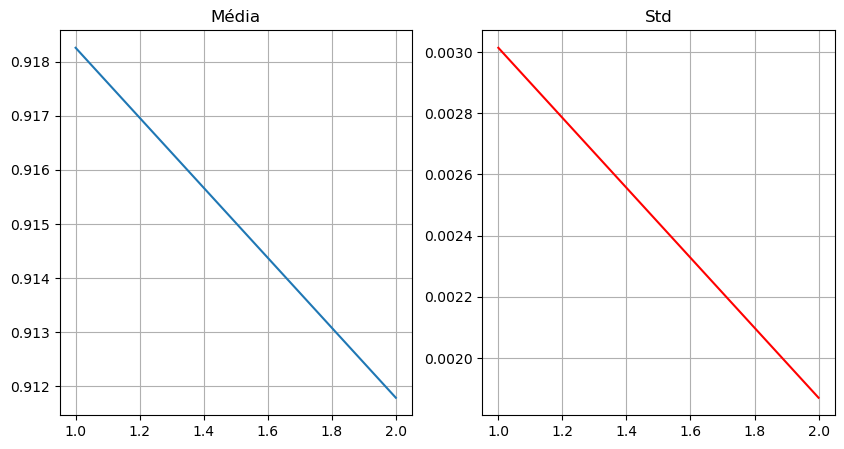

In [287]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(comite_mean_test_score)+1), y=comite_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(comite_std_test_score)+1), y=comite_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [288]:
comite.fit(X_tr_og_norm, y_tr)

VotingClassifier(estimators=[('mlp_0',
                              MLPClassifier(activation='tanh', alpha=0.001,
                                            early_stopping=True,
                                            hidden_layer_sizes=(50, 50),
                                            random_state=4)),
                             ('mlp_1',
                              MLPClassifier(alpha=0.01, early_stopping=True,
                                            hidden_layer_sizes=(50, 50),
                                            random_state=2, solver='sgd'))],
                 voting='soft')

In [289]:
#treinamento
y_pred_train = comite.predict(X_tr_og_norm)

In [290]:
#teste
y_pred = comite.predict(X_test_norm)

Acurácia

In [291]:
#treinamento
treinamento_acc = comite.score(X_tr_og_norm, y_tr)

In [292]:
#teste
teste_acc = comite.score(X_test_norm, y_test)

F1-score

In [293]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [294]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [295]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [296]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [297]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [298]:
#teste
teste_precision = precision_score(y_test, y_pred)

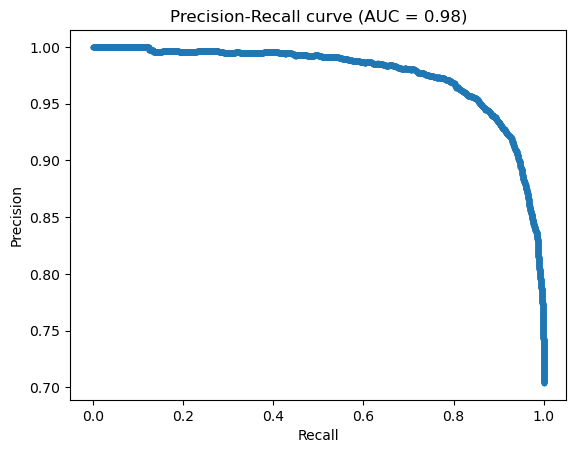

In [299]:
from sklearn.metrics import auc
y_scores = comite.predict_proba(X_test_norm)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [300]:
modelo, etapa, acc, f1, recall, precision, auc = ["comiteMlp", "comiteMlp"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_comiteMlp = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_comiteMlp

,modelo,etapa,métrica,valor
0,comiteMlp,treino,accuracy,0.900148
1,comiteMlp,teste,accuracy,0.891595
2,comiteMlp,treino,f1,0.929978
3,comiteMlp,teste,f1,0.923482
4,comiteMlp,treino,recall,0.941864
5,comiteMlp,teste,recall,0.929239
6,comiteMlp,treino,precision,0.918389
7,comiteMlp,teste,precision,0.917796
8,comiteMlp,treino,auc,0.000000
9,comiteMlp,teste,auc,0.976230


<Axes: xlabel='métrica', ylabel='valor'>

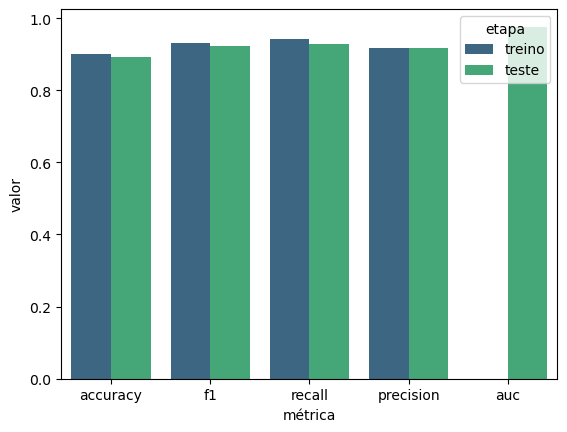

In [301]:
sns.barplot(df_long_comiteMlp, x="métrica", y="valor", hue="etapa", palette="viridis")

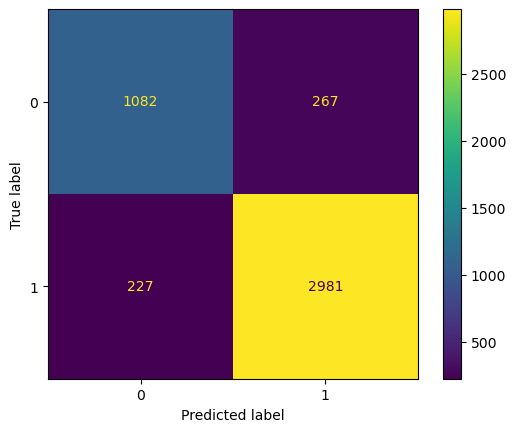

In [302]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## XGBoost

In [303]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, objective="binary:hinge")

In [304]:
param_grid = {
    "n_estimators": np.arange(5, 100, 1),
    "max_leaves": np.arange(0,101,5),
    "grow_policy": ["depthwise", "lossguide"],
    "booster": ["gbtree", "gblinear", "dart"],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": np.arange(1, 17)
}

Estimativa de tempo

In [305]:
tempo_execucao(xgb, param_grid, cv, X_train, y_train)

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tempo de execução: 81.05 segundos, para uma iteração
Tempo de execução: 27 minutos e 1 segundos, para 20 iterações


In [306]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(xgb, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

In [307]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9289533995416348
Modelo 1: 0.9279571947257788
Modelo 2: 0.9279020845285906
Modelo 3: 0.9287901990811639
Modelo 4: 0.9292001530807501
Modelo 5: 0.9273528847996934
Modelo 6: 0.9288575243181385
Modelo 7: 0.9286943223093099
Modelo 8: 0.9294050124354314
Modelo 9: 0.9274085424248228
Modelo 10: 0.9280520474550326
Modelo 11: 0.9279969360398315
Modelo 12: 0.921685587839138
Modelo 13: 0.9262310787507185
Modelo 14: 0.929787641094318
Modelo 15: 0.9264565425023877
Modelo 16: 0.9288032067188394
Modelo 17: 0.9269319051262433
Modelo 18: 0.9250714966634891
Modelo 19: 0.9252193819152995


In [308]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [309]:
dic_modelos[f"modelo_{idx}"].best_params_

{'n_estimators': 43,
 'max_leaves': 15,
 'max_depth': 6,
 'grow_policy': 'lossguide',
 'criterion': 'entropy',
 'booster': 'dart'}

In [310]:
xgb = dic_modelos[f"modelo_{idx}"].best_estimator_
xgb

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='entropy', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=15,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=43, n_jobs=None, ...)

In [311]:
xgb_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
xgb_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
xgb_mean_test_score, xgb_std_test_score

(array([0.91680725, 0.91706382, 0.87878217, 0.87854693, 0.87399226,
        0.92436192, 0.84950219, 0.83374703, 0.9038432 , 0.92245613]),
 array([0.00346864, 0.00326988, 0.00471063, 0.0043717 , 0.00322544,
        0.00330207, 0.00162735, 0.00138798, 0.00250827, 0.00301696]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

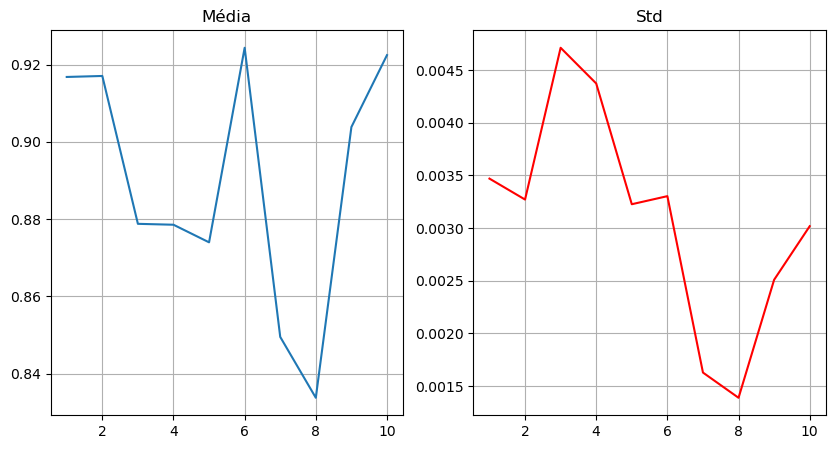

In [312]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(xgb_mean_test_score)+1), y=xgb_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(xgb_std_test_score)+1), y=xgb_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [313]:
xgb.fit(X_tr_og, y_tr)

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:32:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='entropy', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=15,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=43, n_jobs=None, ...)

In [314]:
#treinamento
y_pred_train = xgb.predict(X_tr_og)

In [315]:
#teste
y_pred = xgb.predict(X_test)

Acurácia

In [316]:
#treinamento
treinamento_acc = xgb.score(X_tr_og, y_tr)

In [317]:
#teste
teste_acc = xgb.score(X_test, y_test)

F1-score

In [318]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [319]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [320]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [321]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [322]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [323]:
#teste
teste_precision = precision_score(y_test, y_pred)

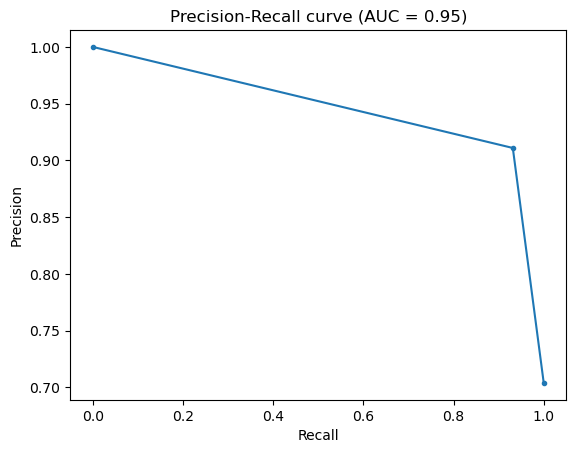

In [404]:
from sklearn.metrics import auc
y_scores = xgb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [325]:
modelo, etapa, acc, f1, recall, precision, auc = ["xgb", "xgb"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_xgb = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_xgb

,modelo,etapa,métrica,valor
0,xgb,treino,accuracy,0.916936
1,xgb,teste,accuracy,0.887645
2,xgb,treino,f1,0.941917
3,xgb,teste,f1,0.921085
4,xgb,treino,recall,0.956671
5,xgb,teste,recall,0.931421
6,xgb,treino,precision,0.927611
7,xgb,teste,precision,0.910976
8,xgb,treino,auc,0.000000
9,xgb,teste,auc,0.945337


<Axes: xlabel='métrica', ylabel='valor'>

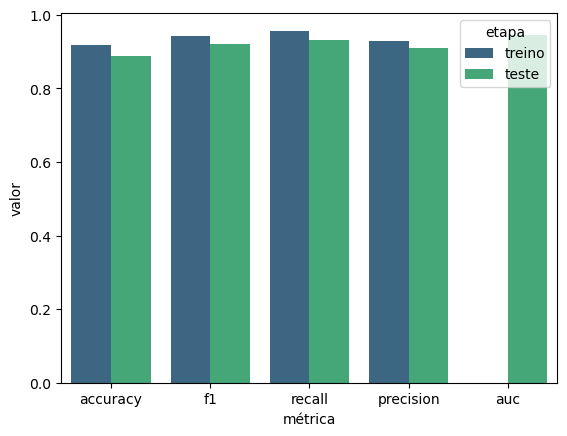

In [326]:
sns.barplot(df_long_xgb, x="métrica", y="valor", hue="etapa", palette="viridis")

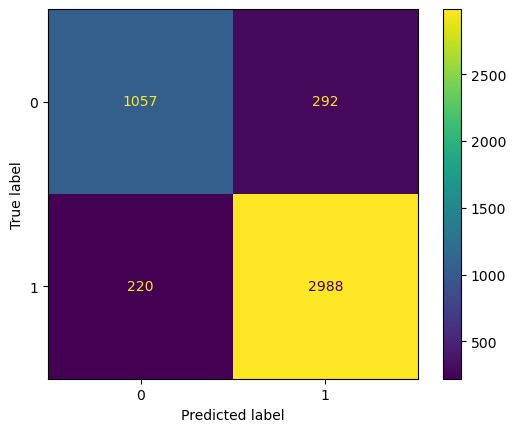

In [327]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## LighGBM

In [328]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=42, subsample=0.8, objective="binary", metric="f1")

In [329]:
param_grid = {
    "boosting_type": ["gbdt", "dart", "rf"],
    "n_estimators": np.arange(50, 251, 25),
    "learning_rate": np.linspace(0.01, 0.15, 25),
    "num_leaves": np.arange(5,101,5),
    "max_depth": np.arange(1, 10)
}

Estimativa de tempo

In [330]:
tempo_execucao(lgbm, param_grid, cv, X_train, y_train)

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1560, in fit
    super().fit(
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\Usuário\anaconda3\Lib\site-packa

[LightGBM] [Info] Number of positive: 10265, number of negative: 4316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 14581, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703998 -> initscore=0.866411
[LightGBM] [Info] Start training from score 0.866411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(lgbm, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

In [332]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9097772744431861
Modelo 1: 0.930223666602944


Modelo 2: 0.930836836071838
Modelo 3: 0.9295612009237876
Modelo 4: 0.929350947731189
Modelo 5: 0.9276807980049875
Modelo 6: 0.9315173604450413
Modelo 7: 0.9274085424248228
Modelo 8: 0.9291579148367386
Modelo 9: 0.9306779011872846
Modelo 10: 0.9269319051262433
Modelo 11: 0.9321058688147296
Modelo 12: 0.9285714285714286
Modelo 13: 0.9335637480798771
Modelo 14: 0.9319571865443425
Modelo 15: 0.9281471546273232
Modelo 16: 0.9257208325377124
Modelo 17: 0.93207981580967
Modelo 18: 0.9301167911162167
Modelo 19: 0.9304730894464662


In [333]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [334]:
dic_modelos[f"modelo_{idx}"].best_params_

{'num_leaves': 75,
 'n_estimators': 225,
 'max_depth': 7,
 'learning_rate': 0.12666666666666665,
 'boosting_type': 'gbdt'}

In [335]:
lgbm = dic_modelos[f"modelo_{idx}"].best_estimator_
lgbm

LGBMClassifier(learning_rate=0.12666666666666665, max_depth=7, metric='f1',
               n_estimators=225, num_leaves=75, objective='binary',
               random_state=42, subsample=0.8)

In [336]:
lgbm_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
lgbm_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
lgbm_mean_test_score, lgbm_std_test_score

(array([       nan, 0.89703406,        nan, 0.92819904,        nan,
        0.92598993, 0.92738704, 0.92662322,        nan, 0.92464636]),
 array([       nan, 0.0025473 ,        nan, 0.00185332,        nan,
        0.00237533, 0.00151959, 0.00152101,        nan, 0.00181703]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

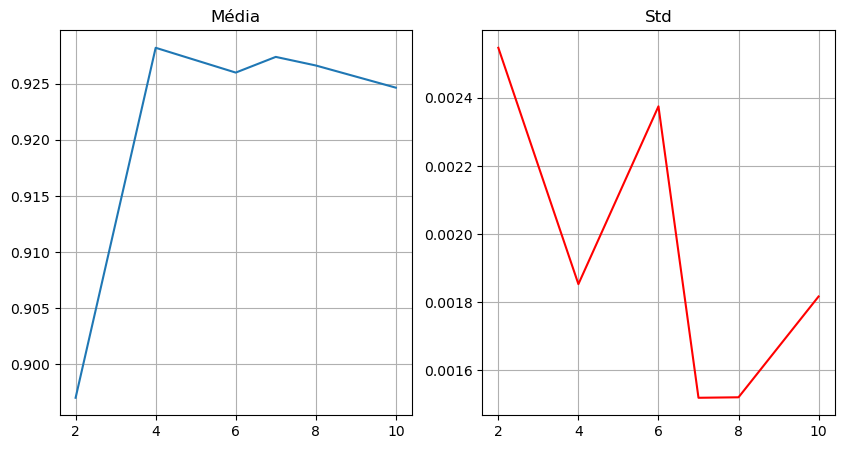

In [337]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(lgbm_mean_test_score)+1), y=lgbm_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(lgbm_std_test_score)+1), y=lgbm_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [338]:
lgbm.fit(X_tr_og, y_tr)

[LightGBM] [Info] Number of positive: 12832, number of negative: 5395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 18227, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.704011 -> initscore=0.866469
[LightGBM] [Info] Start training from score 0.866469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier(learning_rate=0.12666666666666665, max_depth=7, metric='f1',
               n_estimators=225, num_leaves=75, objective='binary',
               random_state=42, subsample=0.8)

In [339]:
#treinamento
y_pred_train = lgbm.predict(X_tr_og)

In [340]:
#teste
y_pred = lgbm.predict(X_test)

Acurácia

In [341]:
#treinamento
treinamento_acc = lgbm.score(X_tr_og, y_tr)

In [342]:
#teste
teste_acc = lgbm.score(X_test, y_test)

F1-score

In [343]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [344]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [345]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [346]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [347]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [348]:
#teste
teste_precision = precision_score(y_test, y_pred)

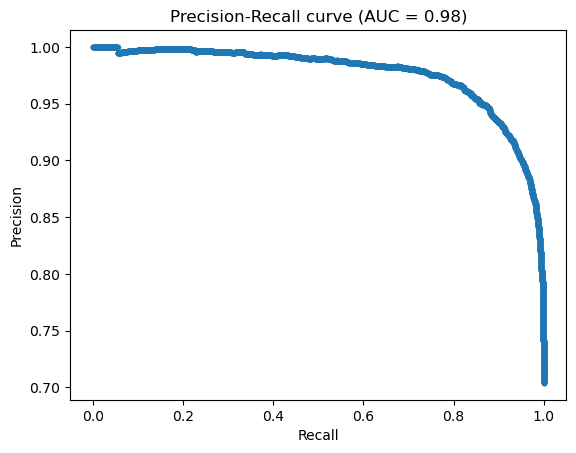

In [349]:
from sklearn.metrics import auc
y_scores = lgbm.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [350]:
modelo, etapa, acc, f1, recall, precision, auc = ["lgbm", "lgbm"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_lgbm = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_lgbm

,modelo,etapa,métrica,valor
0,lgbm,treino,accuracy,0.998683
1,lgbm,teste,accuracy,0.890718
2,lgbm,treino,f1,0.999065
3,lgbm,teste,f1,0.922671
4,lgbm,treino,recall,0.999532
5,lgbm,teste,recall,0.926122
6,lgbm,treino,precision,0.998599
7,lgbm,teste,precision,0.919245
8,lgbm,treino,auc,0.000000
9,lgbm,teste,auc,0.976813


<Axes: xlabel='métrica', ylabel='valor'>

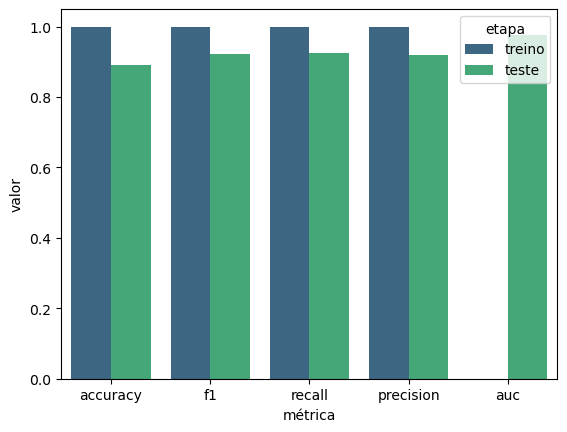

In [351]:
sns.barplot(df_long_lgbm, x="métrica", y="valor", hue="etapa", palette="viridis")

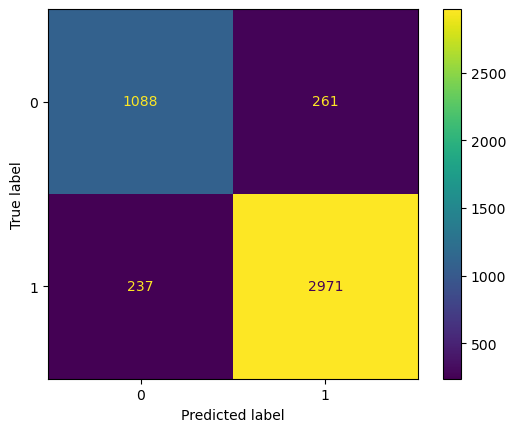

In [352]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Comitê Heterogêneo

In [353]:
from sklearn.ensemble import VotingClassifier


In [354]:
modelos = {"forest": forest, "xgb": xgb, "lgbm": lgbm, "tree": tree}

In [355]:
def random_select_modelos(modelos):
    lista = np.random.choice(list(modelos.keys()), size=np.random.randint(2,len(modelos)), replace=False)
    return [(f"{modelo}", modelos[modelo]) for modelo in lista]

In [356]:
for i in range(10):
    print(f"\n🔄 Rodando RandomizedSearchCV - Execução {i+1}/10 🔄")

    selected_models = random_select_modelos(modelos)  
    voting_clf = VotingClassifier(estimators=selected_models)

    param_distributions = {"voting": ['soft', 'hard']}

    modelo = RandomizedSearchCV(
        estimator=voting_clf,
        param_distributions=param_distributions,
        n_iter=2, 
        cv=cv,
        scoring='f1',
        random_state=i,
        n_jobs=-1
    ).fit(X_train_norm, y_train)
    dic_modelos[f"modelo_{i}"] = modelo


🔄 Rodando RandomizedSearchCV - Execução 1/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 2/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 3/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 4/10 🔄
[LightGBM] [Info] Number of positive: 10265, number of negative: 4316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 14581, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703998 -> initscore=0.866411
[LightGBM] [Info] Start training from score 0.866411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 5/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 6/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 7/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 10265, number of negative: 4316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 14581, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703998 -> initscore=0.866411
[LightGBM] [Info] Start training from score 0.866411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 10265, number of negative: 4316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 14581, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703998 -> initscore=0.866411
[LightGBM] [Info] Start training from score 0.866411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 10/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 10265, number of negative: 4316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 14581, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703998 -> initscore=0.866411
[LightGBM] [Info] Start training from score 0.866411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [357]:
f1_scores = []
for i in range(10):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Modelo 0: 0.826331884757766
Modelo 1: 0.826331884757766
Modelo 2: 0.826331884757766
Modelo 3: 0.826331884757766


c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklea

Modelo 4: 0.826331884757766
Modelo 5: 0.826331884757766
Modelo 6: 0.826331884757766
Modelo 7: 0.826331884757766
Modelo 8: 0.826331884757766
Modelo 9: 0.826331884757766


c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [358]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [359]:
dic_modelos[f"modelo_{idx}"].best_params_

{'voting': 'soft'}

In [401]:
comite = dic_modelos[f"modelo_{idx}"].best_estimator_
comite

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=8,
                                                     max_features=14,
                                                     max_leaf_nodes=13,
                                                     min_samples_leaf=3,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster='dart',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            criterion='entropy', device=None,
                                            early_stopping_round...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=15,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=43, n_jobs=None, ...)),
                             ('forest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=14,
                                                     max_features=7,
                                                     max_leaf_nodes=16,
                                                     min_samples_leaf=13,
                                                     min_samples_split=17,
                                                     n_estimators=130,
                                                     random_state=42))],
                 voting='soft')

In [361]:
comite_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
comite_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
comite_mean_test_score, comite_std_test_score

(array([0.91941502, 0.90999019]), array([0.00269289, 0.00118752]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

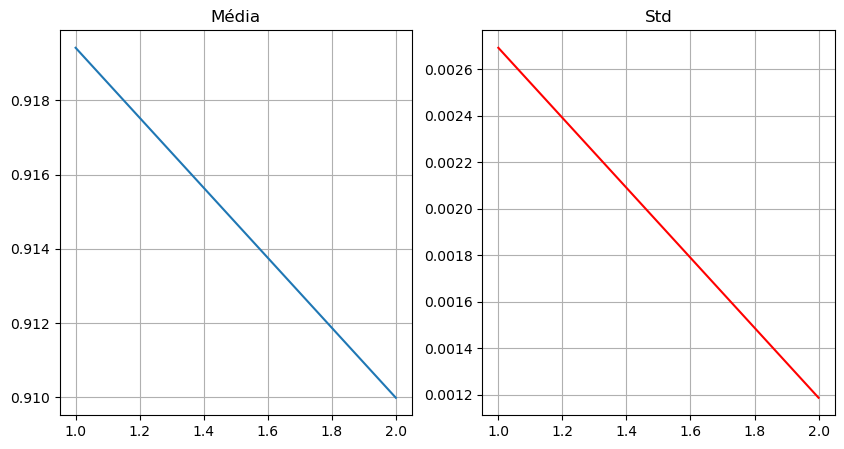

In [405]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(comite_mean_test_score)+1), y=comite_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(comite_std_test_score)+1), y=comite_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [363]:
comite.fit(X_tr_og, y_tr)

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=8,
                                                     max_features=14,
                                                     max_leaf_nodes=13,
                                                     min_samples_leaf=3,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster='dart',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            criterion='entropy', device=None,
                                            early_stopping_round...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=15,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=43, n_jobs=None, ...)),
                             ('forest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=14,
                                                     max_features=7,
                                                     max_leaf_nodes=16,
                                                     min_samples_leaf=13,
                                                     min_samples_split=17,
                                                     n_estimators=130,
                                                     random_state=42))],
                 voting='soft')

In [364]:
#treinamento
y_pred_train = comite.predict(X_tr_og)

In [365]:
#teste
y_pred = comite.predict(X_test)

Acurácia

In [366]:
#treinamento
treinamento_acc = comite.score(X_tr_og, y_tr)

In [367]:
#teste
teste_acc = comite.score(X_test, y_test)

F1-score

In [368]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [369]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [370]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [371]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [372]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [373]:
#teste
teste_precision = precision_score(y_test, y_pred)

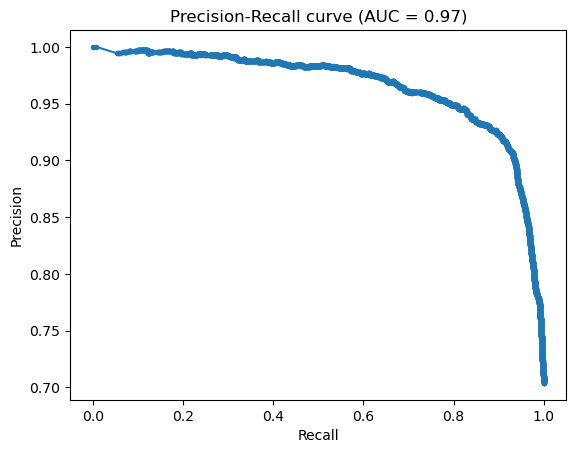

In [374]:
from sklearn.metrics import auc
y_scores = comite.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [375]:
modelo, etapa, acc, f1, recall, precision, auc = ["comiteHet", "comiteHet"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_comiteHet = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_comiteHet

,modelo,etapa,métrica,valor
0,comiteHet,treino,accuracy,0.902946
1,comiteHet,teste,accuracy,0.881282
2,comiteHet,treino,f1,0.932612
3,comiteHet,teste,f1,0.917266
4,comiteHet,treino,recall,0.953943
5,comiteHet,teste,recall,0.934850
6,comiteHet,treino,precision,0.912214
7,comiteHet,teste,precision,0.900330
8,comiteHet,treino,auc,0.000000
9,comiteHet,teste,auc,0.965882


<Axes: xlabel='métrica', ylabel='valor'>

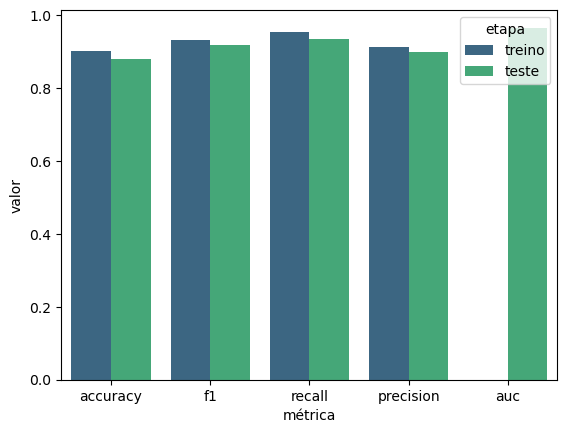

In [376]:
sns.barplot(df_long_comiteHet, x="métrica", y="valor", hue="etapa", palette="viridis")

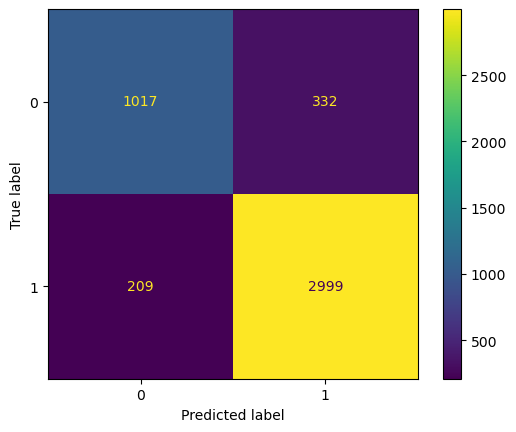

In [377]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

# Análise comparativa

In [378]:
geral = pd.concat([df_long_knn, df_long_svc, df_long_mlp, df_long_tree, df_long_forest, df_long_comiteMlp, df_long_xgb, df_long_lgbm, df_long_comiteHet], axis=0)

In [51]:
geral = pd.read_csv("resultados.csv")
#geral.to_csv("resultados1.csv", index=False)
geral

,modelo,etapa,métrica,valor
0,knn,treino,accuracy,0.889450
1,knn,teste,accuracy,0.861751
2,knn,treino,f1,0.923556
3,knn,teste,f1,0.904372
4,knn,treino,recall,0.948566
...,...,...,...,...
83,comiteHet,teste,recall,0.934850
84,comiteHet,treino,precision,0.912214
85,comiteHet,teste,precision,0.900330
86,comiteHet,treino,auc,0.000000


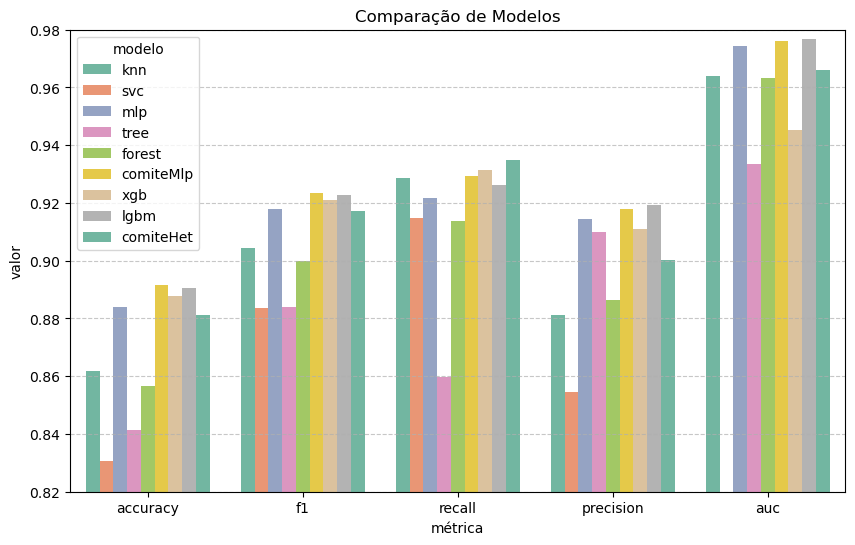

In [394]:
geral_teste = geral[geral["etapa"] == "teste"]
plt.figure(figsize=(10, 6))
sns.barplot(geral_teste, x="métrica", y="valor", hue="modelo", palette="Set2")
plt.title("Comparação de Modelos")
plt.ylim(0.82, 0.98)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

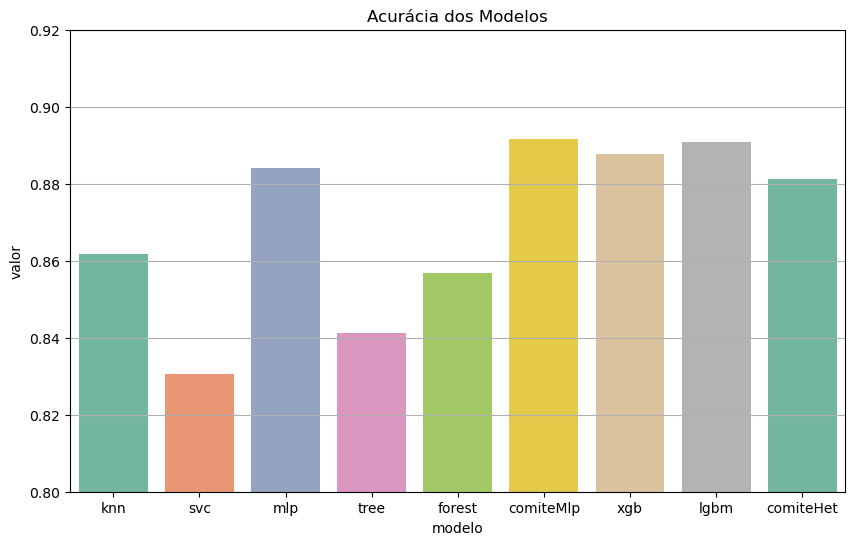

In [381]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("Acurácia dos Modelos")
plt.ylim(0.8, 0.92)
sns.barplot(geral_teste[geral_teste["métrica"]=="accuracy"], x="modelo", y="valor", palette="Set2")
plt.show()

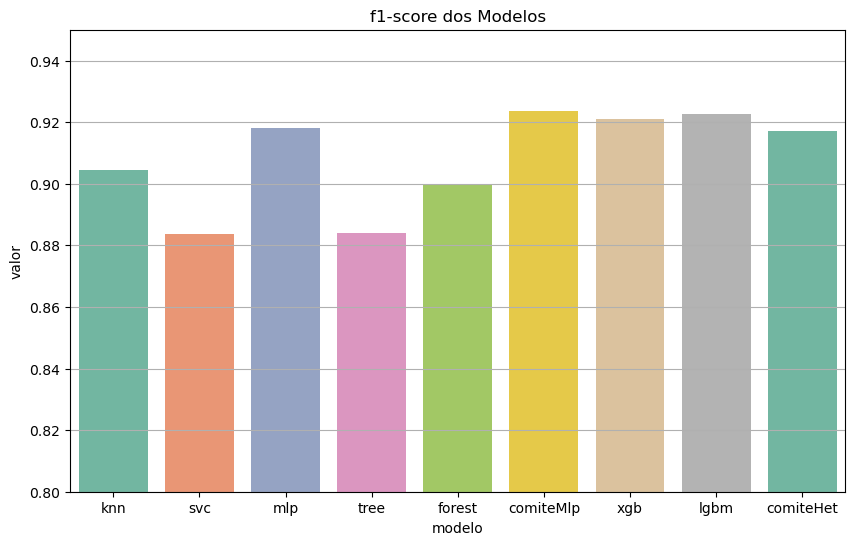

In [382]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("f1-score dos Modelos")
plt.ylim(0.8, 0.95)
sns.barplot(geral_teste[geral_teste["métrica"]=="f1"], x="modelo", y="valor", palette="Set2")
plt.show()

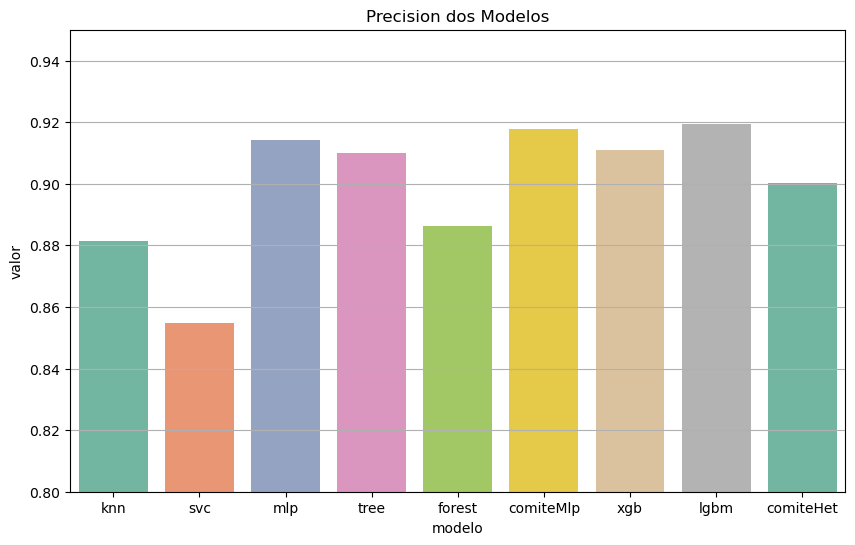

In [383]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("Precision dos Modelos")
plt.ylim(0.8, 0.95)
sns.barplot(geral_teste[geral_teste["métrica"]=="precision"], x="modelo", y="valor", palette="Set2")
plt.show()

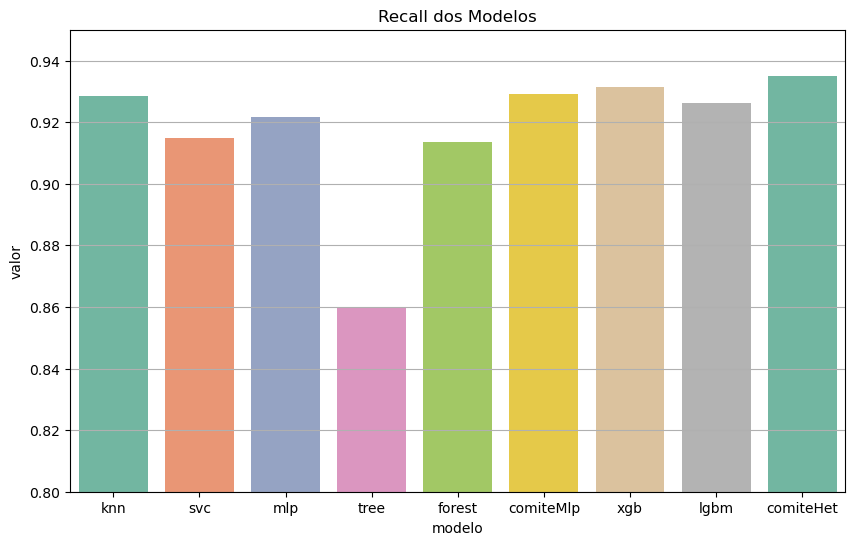

In [384]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("Recall dos Modelos")
plt.ylim(0.8, 0.95)
sns.barplot(geral_teste[geral_teste["métrica"]=="recall"], x="modelo", y="valor", palette="Set2")
plt.show()

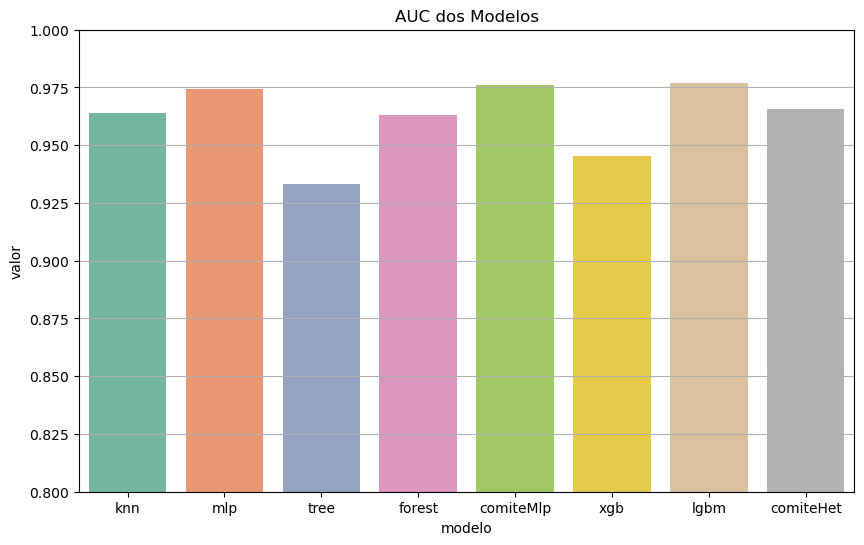

In [407]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("AUC dos Modelos")
plt.ylim(0.8, 1)
sns.barplot(geral_teste[geral_teste["métrica"]=="auc"], x="modelo", y="valor", palette="Set2")
plt.show()

In [386]:
geral_teste[geral_teste["métrica"]=="accuracy"].sort_values(by="valor", ascending=False)

,modelo,etapa,métrica,valor
1,comiteMlp,teste,accuracy,0.891595
1,lgbm,teste,accuracy,0.890718
1,xgb,teste,accuracy,0.887645
1,mlp,teste,accuracy,0.884134
1,comiteHet,teste,accuracy,0.881282
1,knn,teste,accuracy,0.861751
1,forest,teste,accuracy,0.856704
1,tree,teste,accuracy,0.841343
1,svc,teste,accuracy,0.830590


In [387]:
geral_teste[geral_teste["métrica"]=="f1"].sort_values(by="valor", ascending=False)

,modelo,etapa,métrica,valor
3,comiteMlp,teste,f1,0.923482
3,lgbm,teste,f1,0.922671
3,xgb,teste,f1,0.921085
3,mlp,teste,f1,0.918038
3,comiteHet,teste,f1,0.917266
3,knn,teste,f1,0.904372
3,forest,teste,f1,0.899770
3,tree,teste,f1,0.884116
3,svc,teste,f1,0.883770


In [388]:
geral_teste[geral_teste["métrica"]=="recall"].sort_values(by="valor", ascending=False)

,modelo,etapa,métrica,valor
5,comiteHet,teste,recall,0.934850
5,xgb,teste,recall,0.931421
5,comiteMlp,teste,recall,0.929239
5,knn,teste,recall,0.928616
5,lgbm,teste,recall,0.926122
5,mlp,teste,recall,0.921758
5,svc,teste,recall,0.914900
5,forest,teste,recall,0.913653
5,tree,teste,recall,0.859726


In [389]:
geral_teste[geral_teste["métrica"]=="precision"].sort_values(by="valor", ascending=False)

,modelo,etapa,métrica,valor
7,lgbm,teste,precision,0.919245
7,comiteMlp,teste,precision,0.917796
7,mlp,teste,precision,0.914348
7,xgb,teste,precision,0.910976
7,tree,teste,precision,0.909931
7,comiteHet,teste,precision,0.900330
7,forest,teste,precision,0.886302
7,knn,teste,precision,0.881361
7,svc,teste,precision,0.854688


In [390]:
pesos = {"accuracy": 1, "f1": 2.5, "recall": 2, "precision": 1.5, "auc":2}
geral_teste["peso"] = geral_teste["métrica"].map(pesos)
geral_teste["valor_ponderado"] = geral_teste["valor"] * geral_teste["peso"]

top_4 = geral_teste.groupby("modelo")["valor_ponderado"].mean().nlargest(4)
top_4

C:\Users\Usuário\AppData\Local\Temp\ipykernel_14156\2603687169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geral_teste["peso"] = geral_teste["métrica"].map(pesos)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_14156\2603687169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geral_teste["valor_ponderado"] = geral_teste["valor"] * geral_teste["peso"]


modelo
comiteMlp    1.677587
lgbm         1.676427
mlp          1.668621
comiteHet    1.665281
Name: valor_ponderado, dtype: float64

In [391]:
top_4 = geral_teste[geral_teste["modelo"].isin(top_4.index)]
top_4


,modelo,etapa,métrica,valor,peso,valor_ponderado
1,mlp,teste,accuracy,0.884134,1.0,0.884134
3,mlp,teste,f1,0.918038,2.5,2.295095
5,mlp,teste,recall,0.921758,2.0,1.843516
7,mlp,teste,precision,0.914348,1.5,1.371521
9,mlp,teste,auc,0.974419,2.0,1.948838
1,comiteMlp,teste,accuracy,0.891595,1.0,0.891595
3,comiteMlp,teste,f1,0.923482,2.5,2.308705
5,comiteMlp,teste,recall,0.929239,2.0,1.858479
7,comiteMlp,teste,precision,0.917796,1.5,1.376693
9,comiteMlp,teste,auc,0.976230,2.0,1.952460


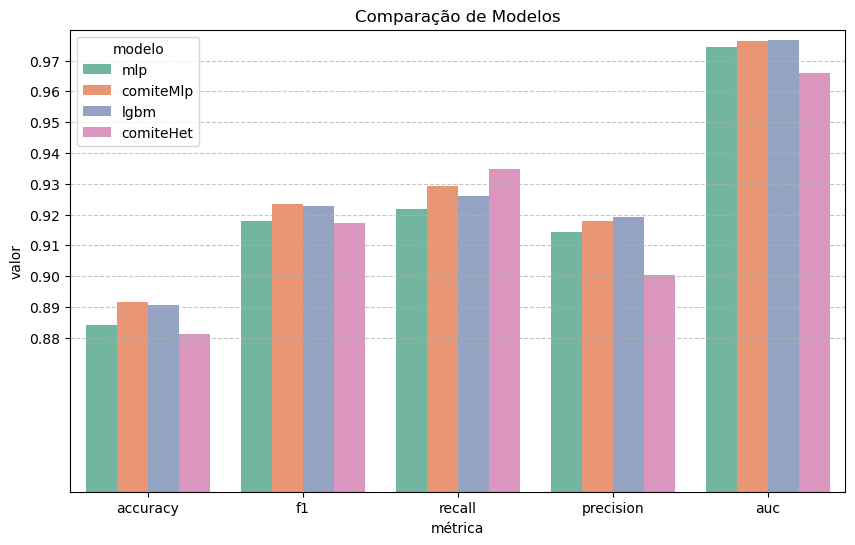

In [396]:
plt.figure(figsize=(10, 6))
sns.barplot(top_4, x="métrica", y="valor", hue="modelo", palette="Set2")
plt.title("Comparação de Modelos")
plt.yticks(ticks=np.arange(0.88,0.98,0.01))
plt.ylim(0.83, 0.98)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()